In [1]:
!python3 --version

Python 3.7.7


In [2]:
!pip install keras==2.3.1

You should consider upgrading via the '/Users/nomanashraf/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate    
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection



from sklearn import metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score,fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence

from keras.preprocessing import sequence
from keras import backend
from keras import backend as K
from keras import models
from keras.models import Sequential
from keras.layers import Dense,LSTM, Dropout, Flatten, Embedding, Bidirectional, GlobalAveragePooling1D
from keras.layers import Conv1D,Conv2D, MaxPooling2D, MaxPooling1D, GlobalMaxPooling1D

from keras.optimizers import SGD,RMSprop,Adam,Adadelta,Adagrad,Adamax
from keras.regularizers import l2,l1

from keras.callbacks import CSVLogger
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot

from keras.layers.normalization import BatchNormalization
from keras.layers import Conv1D,Conv2D, MaxPooling2D, MaxPooling1D


from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import SVG


from scipy.stats import norm
import numpy as np
import csv
import os

Using TensorFlow backend.


In [4]:
import pandas as pd
import spacy
from tqdm import tqdm
import re
import time
import pickle
import string

import nltk
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, PorterStemmer ,WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nomanashraf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nomanashraf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nomanashraf/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
from gensim import models
from gensim.models import Word2Vec
from gensim.models.wrappers import FastText
from gensim.models.fasttext import FastText, load_facebook_vectors
from gensim.models.keyedvectors import KeyedVectors

In [6]:
import spacy
#nlp = spacy.load("en_core_web_md")
nlp = spacy.load('en')

In [7]:
#global random seed code to check it is working
#when you set the random seed at start it works like a global variable...
#you do not need to specify random seed in sklearn


_seed = 20

In [8]:
import tensorflow as tf
import random
def reset_seeds(reset_graph_with_backend=None):
    if reset_graph_with_backend is not None:
        K = reset_graph_with_backend
        K.clear_session()
        tf.compat.v1.reset_default_graph()
        print("KERAS AND TENSORFLOW GRAPHS RESET")  # optional

    np.random.seed(_seed)
    random.seed(_seed)
    tf.compat.v1.set_random_seed(_seed)
    print("RANDOM SEEDS RESET")  # optional

In [9]:
reset_seeds()

RANDOM SEEDS RESET


In [10]:
np.random.seed(_seed) #set random seed to produce same results
print(norm.rvs(10, size = 4))

[10.88389311 10.19586502 10.35753652  7.65673809]


In [11]:


print('Without seed')
print(norm.rvs(10, size = 4))
print(norm.rvs(10, size = 4))

print('With the same seed')
np.random.seed(_seed) 
print(norm.rvs(10, size = 4))
np.random.seed(_seed) # reset the random seed back to 31415
print(norm.rvs(10, size = 4))

print('Without seed')
np.random.seed(None)
print(norm.rvs(10, size = 4))
print(norm.rvs(10, size = 4))

Without seed
[ 8.91516741 10.55969629 10.93946935  9.02151896]
[10.50309684 10.40641447 10.32346101  9.50658912]
With the same seed
[10.88389311 10.19586502 10.35753652  7.65673809]
[10.88389311 10.19586502 10.35753652  7.65673809]
Without seed
[ 9.03146435 10.8597135  10.07884964  8.85677512]
[10.31390061 10.05045136 10.53912387  8.94695299]


In [12]:
pip install tweet-preprocessor

You should consider upgrading via the '/Users/nomanashraf/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:
import preprocessor as p
#https://pypi.org/project/tweet-preprocessor/

def CleanText(text):
  p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.MENTION)
  ctext = p.clean(text.translate(str.maketrans('', '', string.punctuation))) # this line removes all the punctuations
  return ctext

In [14]:
def Remove_StopWords(text):     
    stopWords = set(stopwords.words('english'))
    words = word_tokenize(text)
    wordsFiltered = []
    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)
    text = ' '.join(wordsFiltered)
    return text  

In [15]:
import re
def Replace_Worlds(text):
    replacement_patterns = [
    (r'won\'t', 'will not'),
    (r'can\'t', 'cannot'),
    (r'i\'m', 'i am'),
    (r'ain\'t', 'is not'),
    (r'(\w+)\'ll', '\g<1> will'),
    (r'(\w+)n\'t', '\g<1> not'),
    (r'(\w+)\'ve', '\g<1> have'),
    (r'(\w+)\'s', '\g<1> is'),
    (r'(\w+)\'re', '\g<1> are'),
    (r'(\w+)\'d', '\g<1> would')
    ]
    s = text
    for (pattern, repl) in replacement_patterns:
        s = re.sub(pattern, repl, s)
    return s

In [16]:
abusive_data = "set1_abusive.csv"

In [17]:
df_abuisve = pd.read_csv(abusive_data,usecols=['id','comment','category','replies','topic','title','date','time','political','religion','racism','find_abusive','find_abusive_reply'], sep=',', engine="python")
df_abuisve = df_abuisve[(df_abuisve['find_abusive'] == 1) & (df_abuisve['find_abusive_reply'] == 1)]

df_abuisve = df_abuisve.drop_duplicates(keep=False)
df_abuisve.political = df_abuisve.political.astype(int)
df_abuisve.religion = df_abuisve.religion.astype(int)
df_abuisve.racism = df_abuisve.racism.astype(int)

df_abuisve['word_count'] = df_abuisve['comment'].apply(lambda x: len(str(x).split()))
df_abuisve['char_count'] = df_abuisve['comment'].str.len() ## this also includes spaces


df_abuisve = df_abuisve[df_abuisve['word_count'] <= 75]

df_stats = df_abuisve[['word_count', 'char_count']].agg(['sum','mean'])

print("=========== Dataset Stats ===========")
print(df_stats.shape)
print(df_stats)
print("=========== Dataset Stats ===========")

print("=====================================")
print("Dataset")
print("=====================================")

grouped = df_abuisve.groupby(['topic'])['id','comment','category','replies','topic','title','date','time','political','religion','racism','find_abusive','find_abusive_reply']
print(df_abuisve.groupby(['topic'])['comment'].nunique())
print(df_abuisve.shape)





=========== Dataset Stats ===========
(2, 2)
        word_count     char_count
sum   25858.000000  139209.000000
mean     22.802469     122.759259
=========== Dataset Stats ===========
Dataset
topic
political    225
racism       689
religion     219
Name: comment, dtype: int64
(1134, 15)


In [18]:
nomral_data = "set1_nonabusive.csv"

In [19]:
df_normal = pd.read_csv(nomral_data,usecols=['id','comment','category','replies','topic','title','date','time','political','religion','racism','find_abusive','find_abusive_reply'], sep=',', engine="python")
df_normal = df_normal[(df_normal['find_abusive'] == 0) & (df_normal['find_abusive_reply'] == 0)]

df_normal = df_normal.drop_duplicates(keep=False)
df_normal.political = df_normal.political.astype(int)
df_normal.religion = df_normal.religion.astype(int)
df_normal.racism = df_normal.racism.astype(int)

df_normal['word_count'] = df_normal['comment'].apply(lambda x: len(str(x).split()))
df_normal['char_count'] = df_normal['comment'].str.len() ## this also includes spaces

df_normal = df_normal[df_normal['word_count'] <= 75]

df_stats = df_normal[['word_count', 'char_count']].agg(['sum','mean'])

print("=========== Dataset Stats ===========")
print(df_stats.shape)
print(df_stats)
print("=========== Dataset Stats ===========")


print("=====================================")
print("Dataset")
print("=====================================")


print(df_normal.groupby(['topic'])['comment'].nunique())
print(df_normal.shape)

grouped = df_normal.groupby(['topic'])['id','comment','category','replies','topic','title','date','time','political','religion','racism','find_abusive','find_abusive_reply']

=========== Dataset Stats ===========
(2, 2)
        word_count     char_count
sum   22899.000000  122730.000000
mean     19.521739     104.629156
=========== Dataset Stats ===========
Dataset
topic
political    161
racism       702
religion     308
Name: comment, dtype: int64
(1173, 15)


In [20]:
df = pd.concat([df_normal,df_abuisve])
df.head()

,id,comment,category,replies,topic,title,date,time,political,religion,racism,find_abusive,find_abusive_reply,word_count,char_count
0,UgwrwMF7yHghbMoy-Bp4AaABAg,I m really really proud to be Muslim 💞💞💞💞❤️❤️❤️,"[('proud', 'svp'), ('proud', 'svp')]","['@ imane SOG , wrong answer !', ""It 's full o...",religion,"islam, judaism, and christianity - a conversation",7/27/19,14:58:36,0,1,0,0,0,9,47
1,Ugz5eaDvqlkD4i0k8r54AaABAg,"I dont really care what a person says, I care ...","[('kill', 're'), ('people', 'cds'), ('people',...","['Brother , you are trying to cherry pick vers...",religion,"islam, judaism, and christianity - a conversation",3/1/18,16:20:51,0,1,0,0,0,23,133
2,Ugwf-aGk8N91ciuhuEJ4AaABAg,I just simply love watching this kind of conve...,"[('love', 'asm')]","['The first commandment is God is one , not th...",religion,"islam, judaism, and christianity - a conversation",7/15/19,17:19:44,0,1,0,0,0,17,100
3,Ugz9-4hUrwThGij7Sft4AaABAg,The judge should not have raised her bond that...,"[('power', 'qas')]",['Bail isn ’ t a fine . It ’ s you who doesn ’...,racism,judge flips out after getting flipped off,10/19/19,20:26:51,0,0,1,0,0,16,85
4,Ugyye3eCaEiKwkjlAMR4AaABAg,Religion came when human start thinking more a...,"[('do', 'asm'), ('love', 'asm')]","[""Allah is the god . You mean Mohammad the pro...",religion,the differences between islam and hinduism,1/22/19,5:04:34,0,1,0,0,0,40,248


In [21]:
df['comment']=df['comment'].apply(Replace_Worlds)
df['comment']=df['comment'].apply(CleanText)
df['comment']=df['comment'].apply(Remove_StopWords)
print(df.shape)

(2307, 15)


In [22]:
#run for ngram results
import ast
count = 0
replies = []
for index,row in df.iterrows():
    text_rep = ast.literal_eval(row['replies'])
    
    repl = ""
    for r in text_rep:
        r = Replace_Worlds(r)
        r = CleanText(r)
        r = Remove_StopWords(r)
        repl = repl + " " + r
    
    replies.append(repl)
    
    
    count = count + 1
    #if count == 1:
    #    break

In [22]:
#run for Glove results
import ast
count = 0
replies = []
for index,row in df.iterrows():
    text_rep = ast.literal_eval(row['replies'])
    
    repl = []
    for r in text_rep:
        r = Replace_Worlds(r)
        r = CleanText(r)
        r = Remove_StopWords(r)
        repl.append(r)
    
    replies.append(repl)
    
    
    count = count + 1
    #if count == 1:
    #    break

In [23]:
df['replies']= replies
df.head()

,id,comment,category,replies,topic,title,date,time,political,religion,racism,find_abusive,find_abusive_reply,word_count,char_count
0,UgwrwMF7yHghbMoy-Bp4AaABAg,I really really proud Muslim,"[('proud', 'svp'), ('proud', 'svp')]","[imane SOG wrong answer, It full mistakes]",religion,"islam, judaism, and christianity - a conversation",7/27/19,14:58:36,0,1,0,0,0,9,47
1,Ugz5eaDvqlkD4i0k8r54AaABAg,I dont really care person says I care book say...,"[('kill', 're'), ('people', 'cds'), ('people',...",[Brother trying cherry pick verses justify tho...,religion,"islam, judaism, and christianity - a conversation",3/1/18,16:20:51,0,1,0,0,0,23,133
2,Ugwf-aGk8N91ciuhuEJ4AaABAg,I simply love watching kind conversation Full ...,"[('love', 'asm')]",[The first commandment God one three one know ...,religion,"islam, judaism, and christianity - a conversation",7/15/19,17:19:44,0,1,0,0,0,17,100
3,Ugz9-4hUrwThGij7Sft4AaABAg,The judge raised bond high saying adios Abuse ...,"[('power', 'qas')]",[Bail fine It understand happened But let stop...,racism,judge flips out after getting flipped off,10/19/19,20:26:51,0,0,1,0,0,16,85
4,Ugyye3eCaEiKwkjlAMR4AaABAg,Religion came human start thinking fulfilling ...,"[('do', 'asm'), ('love', 'asm')]",[Allah god You mean Mohammad prophet And marri...,religion,the differences between islam and hinduism,1/22/19,5:04:34,0,1,0,0,0,40,248


In [24]:
yTrain = df[['political','religion','racism']].values
print(yTrain[0])
print(yTrain)

print(yTrain.argmax(axis=1))
yTrain = yTrain.argmax(axis=1)


[0 1 0]
[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [0 1 0]
 [0 0 1]
 [0 0 1]]
[1 1 1 ... 1 2 2]


In [25]:
_ngram_range = (1,1)
_max_features = None
Contextual = True

In [58]:
#train data load
train_text = []
count = 0
for index,row in df.iterrows():
    if  Contextual:
        text = str(row['comment'] + ' ' + row['replies'])
    else:
        text = str(row['comment'])
    train_text.append(text)
    count = count + 1

print(train_text[0])
print("\n")

I really really proud Muslim  imane SOG wrong answer It full mistakes




In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfIdfVectorizer=TfidfVectorizer(smooth_idf=True,use_idf=True, ngram_range= _ngram_range, analyzer = 'word', max_features=_max_features)
X_train = tfIdfVectorizer.fit_transform(train_text).toarray()
print(X_train[0])
print( "Shape of final Ngram vector:" + str(X_train.shape))


[0. 0. 0. ... 0. 0. 0.]
Shape of final Ngram vector:(2307, 18899)


In [60]:
xTrain, yTrain = X_train, yTrain

In [61]:
print(xTrain.shape)
print(yTrain.shape)

(2307, 18899)
(2307,)


In [26]:
scorer = make_scorer(f1_score, average = 'weighted')
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
#from mlxtend.evaluate import confusion_matrix
#from mlxtend.plotting import plot_confusion_matrix

In [27]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion Matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Reds')

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label (avg)')
    plt.xlabel('Predicted label (avg)\naccuracy (avg)={:0.4f}; misclass (avg)={:0.4f}'.format(accuracy, misclass))
    plt.grid(None)
    plt.grid(b=None)
    plt.show()

In [28]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
def LR_Model(X, y):
    clf = OneVsRestClassifier(LogisticRegression(random_state=_seed))
    kfold = StratifiedKFold(n_splits=10, shuffle=False, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    
    count = 1
    for train_index, test_index in kfold.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        
        print("Iteration:" + str(count))
        
        
        print("=== Scores ===")
        #accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize=True)
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test, y_pred, average='macro')
        print('Precision: %f' % precision)
        recall = recall_score(y_test, y_pred, average='macro')
        print('Recall: %f' % recall)
        f1 = f1_score(y_test, y_pred, average='macro')
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        
        
        print("=== Classification Report ===")
        target_names = ['Politics','Religion','Racism']
        print(classification_report(y_test, y_pred, target_names=target_names))
    
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))
        cfmean.append(confusion_matrix(y_test, y_pred))
  
        print('\n')
        count = count + 1
        
        
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = ['Politics','Religion','Racism']
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    return clf
    

Iteration:1
=== Scores ===
Accuracy: 0.818182
Precision: 0.883004
Recall: 0.687189
F1 score: 0.737115
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.88      0.36      0.51        39
    Religion       1.00      0.72      0.84        53
      Racism       0.77      0.99      0.87       139

    accuracy                           0.82       231
   macro avg       0.88      0.69      0.74       231
weighted avg       0.84      0.82      0.80       231

=== Confusion Matrix ===
[[ 14   0  25]
 [  0  38  15]
 [  2   0 137]]


Iteration:2
=== Scores ===
Accuracy: 0.796537
Precision: 0.915771
Recall: 0.638929
F1 score: 0.686334
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.26      0.41        39
    Religion       1.00      0.66      0.80        53
      Racism       0.75      1.00      0.86       139

    accuracy                           0.80       231
   macro a

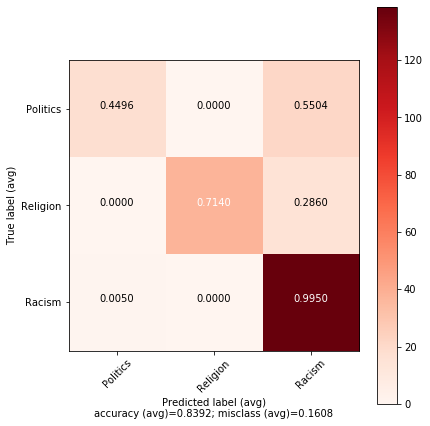

In [65]:
lr = LR_Model(xTrain, yTrain)

In [66]:
def MLP_Model(X, y):
    clf = OneVsRestClassifier(MLPClassifier(random_state=_seed))
    kfold = StratifiedKFold(n_splits=10, shuffle=False, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    
    count = 1
    for train_index, test_index in kfold.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        
        print("Iteration:" + str(count))
        
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test, y_pred, average='macro')
        print('Precision: %f' % precision)
        recall = recall_score(y_test, y_pred, average='macro')
        print('Recall: %f' % recall)
        f1 = f1_score(y_test, y_pred, average='macro')
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        
        
        print("=== Classification Report ===")
        target_names = ['Politics','Religion','Racism']
        print(classification_report(y_test, y_pred, target_names=target_names))
    
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))
        cfmean.append(confusion_matrix(y_test, y_pred))
  
        print('\n')
        count = count + 1
        
        
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = ['Politics','Religion','Racism']
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    return clf
    

Iteration:1
=== Scores ===
Accuracy: 0.874459
Precision: 0.878788
Recall: 0.813865
F1 score: 0.841276
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.82      0.69      0.75        39
    Religion       0.95      0.79      0.87        53
      Racism       0.86      0.96      0.91       139

    accuracy                           0.87       231
   macro avg       0.88      0.81      0.84       231
weighted avg       0.88      0.87      0.87       231

=== Confusion Matrix ===
[[ 27   0  12]
 [  2  42   9]
 [  4   2 133]]


Iteration:2
=== Scores ===
Accuracy: 0.913420
Precision: 0.952858
Recall: 0.846497
F1 score: 0.884953
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.64      0.78        39
    Religion       0.98      0.91      0.94        53
      Racism       0.88      0.99      0.93       139

    accuracy                           0.91       231
   macro a

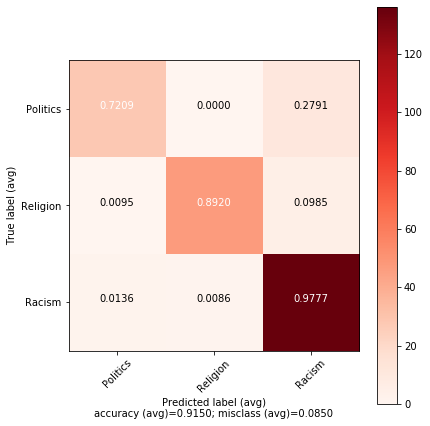

In [67]:
mlp = MLP_Model(xTrain, yTrain)

In [68]:
def AB_Model(X, y):
    clf = OneVsRestClassifier(AdaBoostClassifier(random_state=_seed))
    kfold = StratifiedKFold(n_splits=10, shuffle=False, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    
    count = 1
    for train_index, test_index in kfold.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        
        print("Iteration:" + str(count))
        
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test, y_pred, average='macro')
        print('Precision: %f' % precision)
        recall = recall_score(y_test, y_pred, average='macro')
        print('Recall: %f' % recall)
        f1 = f1_score(y_test, y_pred, average='macro')
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        
        
        print("=== Classification Report ===")
        target_names = ['Politics','Religion','Racism']
        print(classification_report(y_test, y_pred, target_names=target_names))
    
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))
        cfmean.append(confusion_matrix(y_test, y_pred))
  
        print('\n')
        count = count + 1
        
        
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = ['Politics','Religion','Racism']
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    return clf
    

Iteration:1
=== Scores ===
Accuracy: 0.887446
Precision: 0.900228
Recall: 0.831099
F1 score: 0.860320
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.88      0.72      0.79        39
    Religion       0.96      0.81      0.88        53
      Racism       0.87      0.96      0.91       139

    accuracy                           0.89       231
   macro avg       0.90      0.83      0.86       231
weighted avg       0.89      0.89      0.88       231

=== Confusion Matrix ===
[[ 28   0  11]
 [  1  43   9]
 [  3   2 134]]


Iteration:2
=== Scores ===
Accuracy: 0.874459
Precision: 0.924608
Recall: 0.789269
F1 score: 0.835454
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.59      0.74        39
    Religion       0.93      0.79      0.86        53
      Racism       0.84      0.99      0.91       139

    accuracy                           0.87       231
   macro a

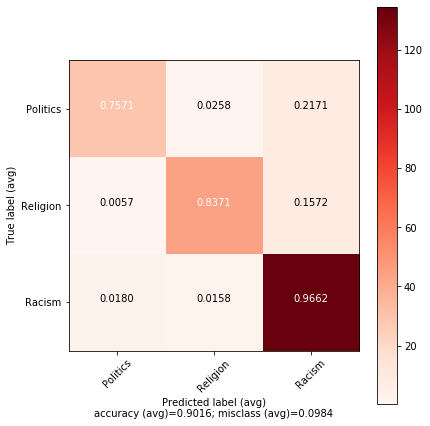

In [69]:
adb = AB_Model(xTrain, yTrain)

In [70]:
def RF_Model(X, y):
    
    clf = OneVsRestClassifier(RandomForestClassifier(random_state=_seed))
    kfold = StratifiedKFold(n_splits=10, shuffle=False, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    
    count = 1
    for train_index, test_index in kfold.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        
        print("Iteration:" + str(count))
        
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test, y_pred, average='macro')
        print('Precision: %f' % precision)
        recall = recall_score(y_test, y_pred, average='macro')
        print('Recall: %f' % recall)
        f1 = f1_score(y_test, y_pred, average='macro')
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        
        
        print("=== Classification Report ===")
        target_names = ['Politics','Religion','Racism']
        print(classification_report(y_test, y_pred, target_names=target_names))
    
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))
        cfmean.append(confusion_matrix(y_test, y_pred))
  
        print('\n')
        count = count + 1
        
        
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = ['Politics','Religion','Racism']
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    return clf
    

Iteration:1
=== Scores ===
Accuracy: 0.848485
Precision: 0.893030
Recall: 0.748652
F1 score: 0.797123
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.87      0.51      0.65        39
    Religion       1.00      0.75      0.86        53
      Racism       0.81      0.98      0.89       139

    accuracy                           0.85       231
   macro avg       0.89      0.75      0.80       231
weighted avg       0.86      0.85      0.84       231

=== Confusion Matrix ===
[[ 20   0  19]
 [  0  40  13]
 [  3   0 136]]


Iteration:2
=== Scores ===
Accuracy: 0.848485
Precision: 0.932950
Recall: 0.725689
F1 score: 0.775982
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.38      0.56        39
    Religion       1.00      0.79      0.88        53
      Racism       0.80      1.00      0.89       139

    accuracy                           0.85       231
   macro a

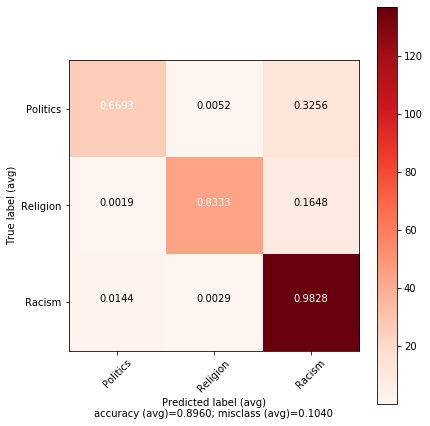

In [71]:
rf = RF_Model(xTrain, yTrain)

In [72]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
def SVM_Model(X, y):

    clf = OneVsRestClassifier(SVC(probability=True,class_weight='balanced', random_state=_seed))
    kfold = StratifiedKFold(n_splits=10, shuffle=False, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    
    count = 1
    for train_index, test_index in kfold.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        
        print("Iteration:" + str(count))
        
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test, y_pred, average='macro')
        print('Precision: %f' % precision)
        recall = recall_score(y_test, y_pred, average='macro')
        print('Recall: %f' % recall)
        f1 = f1_score(y_test, y_pred, average='macro')
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        
        
        print("=== Classification Report ===")
        target_names = ['Politics','Religion','Racism']
        print(classification_report(y_test, y_pred, target_names=target_names))
    
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))
        cfmean.append(confusion_matrix(y_test, y_pred))
  
        print('\n')
        count = count + 1
        
        
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = ['Politics','Religion','Racism']
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    return clf
    

Iteration:1
=== Scores ===
Accuracy: 0.861472
Precision: 0.899747
Recall: 0.769777
F1 score: 0.815205
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.88      0.54      0.67        39
    Religion       1.00      0.79      0.88        53
      Racism       0.82      0.98      0.89       139

    accuracy                           0.86       231
   macro avg       0.90      0.77      0.82       231
weighted avg       0.87      0.86      0.85       231

=== Confusion Matrix ===
[[ 21   0  18]
 [  0  42  11]
 [  3   0 136]]


Iteration:2
=== Scores ===
Accuracy: 0.857143
Precision: 0.920588
Recall: 0.751190
F1 score: 0.803204
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.95      0.49      0.64        39
    Religion       1.00      0.77      0.87        53
      Racism       0.81      0.99      0.89       139

    accuracy                           0.86       231
   macro a

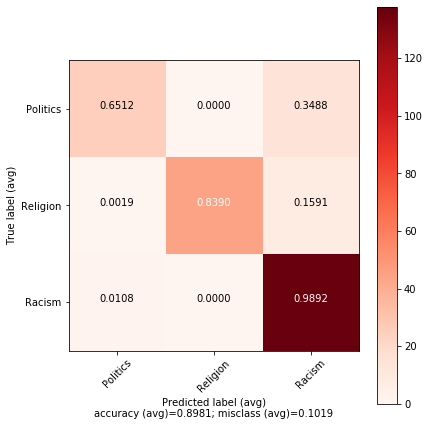

In [73]:
svm = SVM_Model(xTrain, yTrain)

In [74]:
def NB_Model(X, y):
    
    clf = OneVsRestClassifier(GaussianNB())
    kfold = StratifiedKFold(n_splits=10, shuffle=False, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    
    count = 1
    for train_index, test_index in kfold.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        
        print("Iteration:" + str(count))
        
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test, y_pred, average='macro')
        print('Precision: %f' % precision)
        recall = recall_score(y_test, y_pred, average='macro')
        print('Recall: %f' % recall)
        f1 = f1_score(y_test, y_pred, average='macro')
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        
        
        print("=== Classification Report ===")
        target_names = ['Politics','Religion','Racism']
        print(classification_report(y_test, y_pred, target_names=target_names))
    
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))
        cfmean.append(confusion_matrix(y_test, y_pred))
  
        print('\n')
        count = count + 1
        
        
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = ['Politics','Religion','Racism']
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    return clf
    

Iteration:1
=== Scores ===
Accuracy: 0.805195
Precision: 0.814084
Recall: 0.682877
F1 score: 0.724898
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.71      0.44      0.54        39
    Religion       0.94      0.64      0.76        53
      Racism       0.79      0.97      0.87       139

    accuracy                           0.81       231
   macro avg       0.81      0.68      0.72       231
weighted avg       0.81      0.81      0.79       231

=== Confusion Matrix ===
[[ 17   2  20]
 [  3  34  16]
 [  4   0 135]]


Iteration:2
=== Scores ===
Accuracy: 0.792208
Precision: 0.778625
Recall: 0.682216
F1 score: 0.704777
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.72      0.33      0.46        39
    Religion       0.82      0.79      0.81        53
      Racism       0.79      0.92      0.85       139

    accuracy                           0.79       231
   macro a

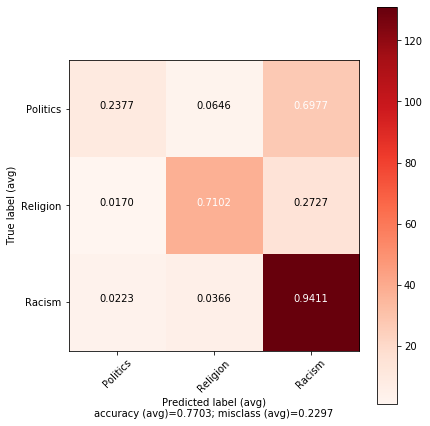

In [75]:
nb = NB_Model(xTrain, yTrain)

In [76]:
def DT_Model(X, y):
    
    clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=_seed))
    kfold = StratifiedKFold(n_splits=10, shuffle=False, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    
    count = 1
    for train_index, test_index in kfold.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        
        print("Iteration:" + str(count))
        
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test, y_pred, average='macro')
        print('Precision: %f' % precision)
        recall = recall_score(y_test, y_pred, average='macro')
        print('Recall: %f' % recall)
        f1 = f1_score(y_test, y_pred, average='macro')
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        
        
        print("=== Classification Report ===")
        target_names = ['Politics','Religion','Racism']
        print(classification_report(y_test, y_pred, target_names=target_names))
    
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))
        cfmean.append(confusion_matrix(y_test, y_pred))
  
        print('\n')
        count = count + 1
        
        
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = ['Politics','Religion','Racism']
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    return clf
    

Iteration:1
=== Scores ===
Accuracy: 0.861472
Precision: 0.859311
Recall: 0.802780
F1 score: 0.826969
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.84      0.69      0.76        39
    Religion       0.87      0.77      0.82        53
      Racism       0.86      0.94      0.90       139

    accuracy                           0.86       231
   macro avg       0.86      0.80      0.83       231
weighted avg       0.86      0.86      0.86       231

=== Confusion Matrix ===
[[ 27   3   9]
 [  0  41  12]
 [  5   3 131]]


Iteration:2
=== Scores ===
Accuracy: 0.826840
Precision: 0.861895
Recall: 0.712690
F1 score: 0.757411
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.90      0.46      0.61        39
    Religion       0.88      0.70      0.78        53
      Racism       0.80      0.98      0.88       139

    accuracy                           0.83       231
   macro a

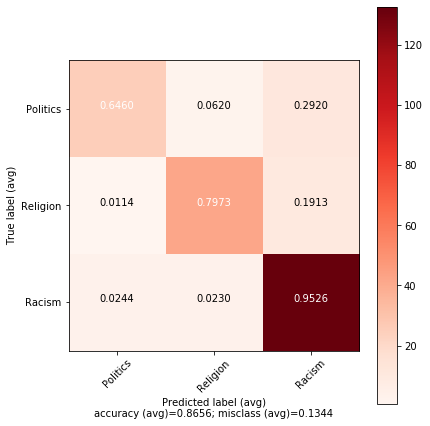

In [77]:
dt = DT_Model(xTrain, yTrain)

In [78]:
from sklearn.model_selection import StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
def VC_Model(X, y):
    
    clf1 = OneVsRestClassifier(LogisticRegression(random_state=_seed))
    clf2 = OneVsRestClassifier(RandomForestClassifier(random_state=_seed))
    clf3 = OneVsRestClassifier(GaussianNB())
    clf = OneVsRestClassifier(VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft'))
    
    kfold = StratifiedKFold(n_splits=10, shuffle=False, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    
    count = 1
    for train_index, test_index in kfold.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        
        print("Iteration:" + str(count))
        
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test, y_pred, average='macro')
        print('Precision: %f' % precision)
        recall = recall_score(y_test, y_pred, average='macro')
        print('Recall: %f' % recall)
        f1 = f1_score(y_test, y_pred, average='macro')
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        
        
        print("=== Classification Report ===")
        target_names = ['Politics','Religion','Racism']
        print(classification_report(y_test, y_pred, target_names=target_names))
    
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))
        cfmean.append(confusion_matrix(y_test, y_pred))
  
        print('\n')
        count = count + 1
        
        
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = ['Politics','Religion','Racism']
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    return clf
    

Iteration:1
=== Scores ===
Accuracy: 0.844156
Precision: 0.865889
Recall: 0.736213
F1 score: 0.779372
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.83      0.49      0.61        39
    Religion       0.95      0.74      0.83        53
      Racism       0.82      0.99      0.90       139

    accuracy                           0.84       231
   macro avg       0.87      0.74      0.78       231
weighted avg       0.85      0.84      0.83       231

=== Confusion Matrix ===
[[ 19   2  18]
 [  2  39  12]
 [  2   0 137]]


Iteration:2
=== Scores ===
Accuracy: 0.870130
Precision: 0.929619
Recall: 0.763909
F1 score: 0.809655
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.46      0.63        39
    Religion       0.96      0.83      0.89        53
      Racism       0.83      1.00      0.91       139

    accuracy                           0.87       231
   macro a

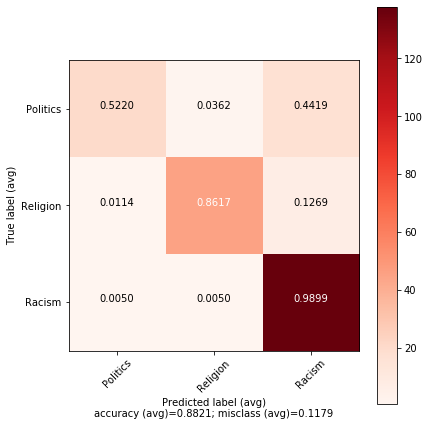

In [79]:
vc = VC_Model(xTrain, yTrain)

In [29]:
glove_vec = True
if glove_vec:
    from gensim.models.keyedvectors import KeyedVectors
    glove_path = "/Users/nomanashraf/Documents/gensim_glove.6B.300d.txt"
    w2vec_model = KeyedVectors.load_word2vec_format(glove_path, binary=False)
    print("GloVe Model Loaded!")
else:
    #load word_to_vector_file
    w2v_file = "/Users/nomanashraf/Documents/GoogleNews-vectors-negative300.bin"
    #w2vec_model = models.KeyedVectors.load_word2vec_format(w2v_file, binary=True, limit=1000000)
    w2vec_model = models.KeyedVectors.load_word2vec_format(w2v_file, binary=True)
    print("W2Vec Model Loaded!")

GloVe Model Loaded!


In [49]:
def Generate_Glove_Vectors(w2vmodel , sentences, word_size):
    vector = w2vmodel['easy']
    #print( "Shape of Vector:" + str(vector.shape))  
    X_train_Vector = []
    for sen in sentences:
        vector_list = []
        list_of_words = str(sen).split(" ")
        
        for word in list_of_words:
            if word in w2vmodel.vocab:
                vector_list.append(w2vmodel[word])
                
        if len(vector_list) > word_size:
            vector_list = vector_list[0:word_size]        
        #print(len(vector_list))        
        
        for i in range(len(vector_list),word_size):
            vector_list.append(np.random.uniform(-0.1, 0.1, 300))
            
        
        matrix_2d = np.array(vector_list)
        #average_sentence_vector = np.mean(matrix_2d, axis = 0)
        X_train_Vector.append(matrix_2d)
            
    X = np.array(X_train_Vector)
    print(X.shape)
    return X

In [31]:
count = 0
Xvectors= []
for index,row in df.iterrows():
    text_rep = row['replies']
    #print(text_rep)
    matrix_3d = Generate_Glove_Vectors(w2vec_model, text_rep, word_size = 24)
    matrix_2d = np.mean(matrix_3d, axis = 0)
    Xvectors.append(matrix_2d)

        
    count = count + 1
    #if count == 1:
    #    break

xReplies = np.array(Xvectors)

print("Final Shape:")
print(xReplies.shape)
    

(2, 24, 300)
(1, 24, 300)
(2, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(3, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(1, 24, 300)
(4, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(4, 24, 300)
(2, 24, 300)
(1, 24, 300)
(3, 24, 300)
(4, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(4, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(5, 24, 300)
(2, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(1, 24, 300)
(3, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(2, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(1, 24, 300)
(2, 24, 300)
(5, 24, 300)
(1, 24, 300)
(1, 24, 300)
(5, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(5, 24, 300)
(2, 24, 300)
(4, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)

(2, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(1, 24, 300)
(2, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(5, 24, 300)
(4, 24, 300)
(3, 24, 300)
(1, 24, 300)
(1, 24, 300)
(5, 24, 300)
(1, 24, 300)
(2, 24, 300)
(2, 24, 300)
(1, 24, 300)
(5, 24, 300)
(1, 24, 300)
(2, 24, 300)
(3, 24, 300)
(2, 24, 300)
(1, 24, 300)
(4, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(2, 24, 300)
(1, 24, 300)
(5, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(1, 24, 300)
(2, 24, 300)
(4, 24, 300)
(1, 24, 300)
(2, 24, 300)
(2, 24, 300)
(1, 24, 300)
(2, 24, 300)
(1, 24, 300)
(4, 24, 300)
(1, 24, 300)
(4, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(2, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(4, 24, 300)
(2, 24, 300)
(1, 24, 300)
(3, 24, 300)
(2, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(5, 24, 300)
(5, 24, 300)
(1, 24, 300)
(5, 24, 300)

(5, 24, 300)
(1, 24, 300)
(2, 24, 300)
(3, 24, 300)
(5, 24, 300)
(1, 24, 300)
(1, 24, 300)
(4, 24, 300)
(5, 24, 300)
(1, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(2, 24, 300)
(5, 24, 300)
(4, 24, 300)
(3, 24, 300)
(1, 24, 300)
(5, 24, 300)
(4, 24, 300)
(1, 24, 300)
(1, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(1, 24, 300)
(4, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(2, 24, 300)
(3, 24, 300)
(2, 24, 300)
(5, 24, 300)
(5, 24, 300)
(3, 24, 300)
(5, 24, 300)
(5, 24, 300)
(3, 24, 300)
(2, 24, 300)
(5, 24, 300)
(3, 24, 300)
(1, 24, 300)
(4, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(3, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(4, 24, 300)
(4, 24, 300)
(1, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(3, 24, 300)
(1, 24, 300)
(3, 24, 300)
(2, 24, 300)
(5, 24, 300)
(3, 24, 300)
(5, 24, 300)
(2, 24, 300)
(3, 24, 300)
(3, 24, 300)
(5, 24, 300)
(1, 24, 300)
(1, 24, 300)
(5, 24, 300)
(5, 24, 300)
(1, 24, 300)
(5, 24, 300)
(5, 24, 300)

(4, 24, 300)
(5, 24, 300)
(4, 24, 300)
(2, 24, 300)
(1, 24, 300)
(2, 24, 300)
(4, 24, 300)
(5, 24, 300)
(3, 24, 300)
(5, 24, 300)
(4, 24, 300)
(4, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(3, 24, 300)
(5, 24, 300)
(2, 24, 300)
(5, 24, 300)
(2, 24, 300)
(5, 24, 300)
(4, 24, 300)
(1, 24, 300)
(5, 24, 300)
(1, 24, 300)
(5, 24, 300)
(5, 24, 300)
(1, 24, 300)
(4, 24, 300)
(2, 24, 300)
(5, 24, 300)
(5, 24, 300)
(3, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(2, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(3, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(1, 24, 300)
(1, 24, 300)
(4, 24, 300)
(5, 24, 300)
(5, 24, 300)
(1, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(3, 24, 300)
(1, 24, 300)
(5, 24, 300)
(3, 24, 300)
(4, 24, 300)
(1, 24, 300)
(5, 24, 300)
(5, 24, 300)
(4, 24, 300)
(1, 24, 300)
(2, 24, 300)
(3, 24, 300)
(1, 24, 300)
(4, 24, 300)
(4, 24, 300)
(5, 24, 300)
(4, 24, 300)
(3, 24, 300)

In [50]:
xData = Generate_Glove_Vectors(w2vec_model, df.comment.tolist(), word_size = 24)

(2307, 24, 300)


In [51]:
Contextual = False

if Contextual:
    xTrain = np.mean([ xData, xReplies ], axis=0)
    #xTrain = np.concatenate([ xData, xReplies ], axis=1)
else:
    xTrain = xData

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
yTrain = encoder.fit_transform(yTrain)
yTrain = yTrain.argmax(axis=1)
yTrain = encoder.fit_transform(yTrain)




In [52]:
print(xTrain.shape)
print(yTrain.shape)

(2307, 24, 300)
(2307, 3)


In [53]:
def Shape_Reshaper(_xTrain, _xTest):    
    xTrain_arr = _xTrain
    xTest_arr = _xTest


    dim1,dim3 = _xTrain.shape
    dim2 = 1        

    xTrain = np.reshape(_xTrain, (dim1, dim2 , dim3)) #xTrain_arr.reshape(dim1, dim2 , dim3)
    print(xTrain.shape)       

    t_dim1,t_dim3 = _xTest.shape
    t_dim2 = 1
    xTest = xTest_arr.reshape(t_dim1, t_dim2 , t_dim3)
    print(xTest.shape)

    _input_shape = (dim2,dim3)
    print(_input_shape)


    return xTrain,xTest,_input_shape

In [54]:
def Shape_Reshaper_Vec(_xTrain, _xTest): 

    print(_xTrain.shape)
    print(_xTest.shape)

    dim1, dim2, dim3 = _xTrain.shape    
    xTrain = _xTrain
    print(xTrain.shape)        

    t_dim1, t_dim2, t_dim3 = _xTest.shape
    xTest = _xTest
    print(xTest.shape)

    _input_shape = (dim2,dim3)
    print(_input_shape)

    return xTrain,xTest,_input_shape



In [55]:
def Generate_Graph(history):
                # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [56]:
from keras.callbacks import Callback
from keras.callbacks import ModelCheckpoint, EarlyStopping
class EarlyStoppingByLossVal(Callback):
    
    def __init__(self, monitor='val_loss', value=0.0001, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

In [57]:
class_names = [0,1,2]
target_names = ['Politics','Religion','Racism']

In [113]:
from keras_self_attention import SeqSelfAttention
def CNN1D(X, y, _target_names = [], _class_names = [], algoname= ' ', _loss='categorical_crossentropy', _optimizer = Adam(lr=0.0001), _metrics=['accuracy'], _epochs = 25 , _validation_split = 0.1, _batch_size = 2, _verbose = 2, graph = False, _kernel_regularizer=l2(0.0001), _bias_regularizer=l2(0.0001)):
    print("--------------- CNN1D ---------------")  

    n_classes = 3
    
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    
    
    count = 1
    for i, (train_index, test_index) in enumerate(kfold.split(X, y.argmax(axis=1))):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        if X_train.ndim == 2:
            xTrain,xTest,_input_shape = Shape_Reshaper(X_train, X_test)
        else:
            xTrain,xTest,_input_shape = Shape_Reshaper_Vec(X_train, X_test)
        
        
            
        model = Sequential()

        model.add(Conv1D(4, kernel_size=3, strides= 3, padding='same',activation='elu', input_shape=_input_shape,kernel_regularizer= _kernel_regularizer, bias_regularizer= _bias_regularizer))
        model.add(Dropout(0.5))
        model.add(Dense(8 ,activation='elu'))
        model.add(Dropout(0.5))

        
        model.add(Flatten()) 
        model.add(Dense(n_classes ,activation='softmax'))
        model.summary()


        model.compile(loss=_loss, optimizer=_optimizer, metrics=_metrics)
        
        checkpoint_filepath = 'checkpoint.txt'
        callbacks = [ EarlyStoppingByLossVal(monitor='val_loss', value=.20, verbose=1),
                      ModelCheckpoint(filepath = checkpoint_filepath, monitor='val_loss', save_best_only=True, verbose=0)
                     ]
        
        
        
        history = model.fit(xTrain.astype('float32'), y_train, epochs=_epochs,validation_split = _validation_split,callbacks=callbacks)
        
        # save model and architecture to single file
        model.save("model.h5")
        print("Saved model to disk")
        

        score = model.evaluate(xTest, y_test, verbose=1)
        print("Test Score:", score[0])
        print("Test Accuracy:", score[1])

        accuracy = model.evaluate(xTest, y_test,  verbose=_verbose)
        
        y_pred = model.predict_classes(xTest)
        
        
        if graph:
            Generate_Graph(history)
            
    
        
        
        
        print("Iteration:" + str(count))
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test.argmax(axis=1), y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test.argmax(axis=1), y_pred, average='macro' )
        print('Precision: %f' % precision)
        recall = recall_score(y_test.argmax(axis=1), y_pred, average='macro')
        print('Recall: %f' % recall)
        f1 = f1_score(y_test.argmax(axis=1), y_pred, average='macro')
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        

        print("=== Classification Report ===")
        target_names = _target_names
        print(classification_report(y_test.argmax(axis=1), y_pred, target_names=target_names))
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test.argmax(axis=1), y_pred))
        cfmean.append(confusion_matrix(y_test.argmax(axis=1), y_pred))
  
        print('\n')
        count = count + 1
        
        
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = _class_names
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    return model, kfold        
        

RANDOM SEEDS RESET
--------------- CNN1D ---------------
(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_70 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_52 (Dropout)         (None, 8, 4)              0         
_________________________________________________________________
dense_126 (Dense)            (None, 8, 8)              40        
_________________________________________________________________
dropout_53 (Dropout)         (None, 8, 8)              0         
_________________________________________________________________
flatten_69 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_127 (Dense)            (None, 3)                 1

Epoch 48/50
1868/1868 [==============================] - 0s 105us/step - loss: 0.7693 - accuracy: 0.6809 - val_loss: 0.8155 - val_accuracy: 0.6490
Epoch 49/50
1868/1868 [==============================] - 0s 109us/step - loss: 0.7786 - accuracy: 0.6767 - val_loss: 0.8194 - val_accuracy: 0.6442
Epoch 50/50
1868/1868 [==============================] - 0s 109us/step - loss: 0.7626 - accuracy: 0.6777 - val_loss: 0.8167 - val_accuracy: 0.6442
Saved model to disk
231/231 [==============================] - 0s 98us/step
Test Score: 0.763328781633666
Test Accuracy: 0.6839826703071594
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


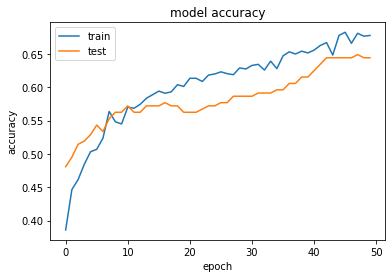

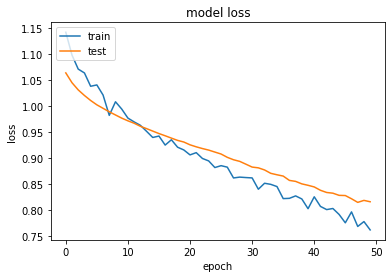

Iteration:1
=== Scores ===
Accuracy: 0.683983
Precision: 0.747666
Recall: 0.478674
F1 score: 0.498220
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.57      0.21      0.30        39
    Religion       1.00      0.25      0.39        53
      Racism       0.67      0.99      0.80       139

    accuracy                           0.68       231
   macro avg       0.75      0.48      0.50       231
weighted avg       0.73      0.68      0.62       231

=== Confusion Matrix ===
[[  8   0  31]
 [  4  13  36]
 [  2   0 137]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_71 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_54 (Dropout)         (None, 8, 4)              

1868/1868 [==============================] - 0s 109us/step - loss: 0.7571 - accuracy: 0.6938 - val_loss: 0.8071 - val_accuracy: 0.6731
Epoch 45/50
1868/1868 [==============================] - 0s 107us/step - loss: 0.7585 - accuracy: 0.6863 - val_loss: 0.8146 - val_accuracy: 0.6538
Epoch 46/50
1868/1868 [==============================] - 0s 109us/step - loss: 0.7570 - accuracy: 0.6970 - val_loss: 0.8084 - val_accuracy: 0.6587
Epoch 47/50
1868/1868 [==============================] - 0s 108us/step - loss: 0.7502 - accuracy: 0.6842 - val_loss: 0.8118 - val_accuracy: 0.6538
Epoch 48/50
1868/1868 [==============================] - 0s 108us/step - loss: 0.7414 - accuracy: 0.6970 - val_loss: 0.8068 - val_accuracy: 0.6587
Epoch 49/50
1868/1868 [==============================] - 0s 108us/step - loss: 0.7440 - accuracy: 0.7002 - val_loss: 0.8039 - val_accuracy: 0.6587
Epoch 50/50
1868/1868 [==============================] - 0s 110us/step - loss: 0.7330 - accuracy: 0.7024 - val_loss: 0.8106 - val_

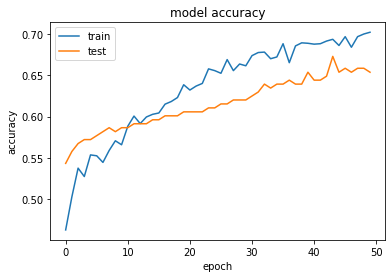

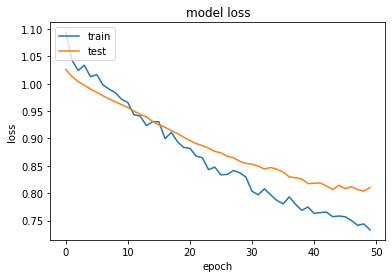

Iteration:2
=== Scores ===
Accuracy: 0.731602
Precision: 0.659211
Recall: 0.530419
F1 score: 0.522498
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.50      0.05      0.09        39
    Religion       0.74      0.55      0.63        53
      Racism       0.73      0.99      0.84       139

    accuracy                           0.73       231
   macro avg       0.66      0.53      0.52       231
weighted avg       0.70      0.73      0.67       231

=== Confusion Matrix ===
[[  2   9  28]
 [  2  29  22]
 [  0   1 138]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_72 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_56 (Dropout)         (None, 8, 4)              

1868/1868 [==============================] - 0s 116us/step - loss: 0.7722 - accuracy: 0.6638 - val_loss: 0.8346 - val_accuracy: 0.6394
Epoch 45/50
1868/1868 [==============================] - 0s 117us/step - loss: 0.7766 - accuracy: 0.6756 - val_loss: 0.8311 - val_accuracy: 0.6394
Epoch 46/50
1868/1868 [==============================] - 0s 115us/step - loss: 0.7601 - accuracy: 0.6847 - val_loss: 0.8294 - val_accuracy: 0.6394
Epoch 47/50
1868/1868 [==============================] - 0s 114us/step - loss: 0.7643 - accuracy: 0.6852 - val_loss: 0.8200 - val_accuracy: 0.6442
Epoch 48/50
1868/1868 [==============================] - 0s 116us/step - loss: 0.7737 - accuracy: 0.6842 - val_loss: 0.8154 - val_accuracy: 0.6490
Epoch 49/50
1868/1868 [==============================] - 0s 115us/step - loss: 0.7600 - accuracy: 0.6863 - val_loss: 0.8161 - val_accuracy: 0.6442
Epoch 50/50
1868/1868 [==============================] - 0s 116us/step - loss: 0.7658 - accuracy: 0.6799 - val_loss: 0.8147 - val_

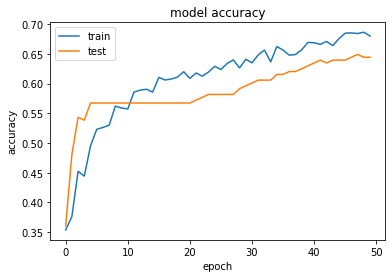

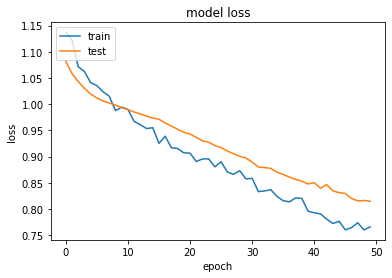

Iteration:3
=== Scores ===
Accuracy: 0.679654
Precision: 0.529182
Recall: 0.468255
F1 score: 0.463227
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.11      0.03      0.04        39
    Religion       0.79      0.42      0.54        53
      Racism       0.69      0.96      0.80       139

    accuracy                           0.68       231
   macro avg       0.53      0.47      0.46       231
weighted avg       0.61      0.68      0.62       231

=== Confusion Matrix ===
[[  1   3  35]
 [  6  22  25]
 [  2   3 134]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_73 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_58 (Dropout)         (None, 8, 4)              

1868/1868 [==============================] - 0s 121us/step - loss: 0.7772 - accuracy: 0.6799 - val_loss: 0.7517 - val_accuracy: 0.6827
Epoch 45/50
1868/1868 [==============================] - 0s 120us/step - loss: 0.7782 - accuracy: 0.6740 - val_loss: 0.7446 - val_accuracy: 0.6827
Epoch 46/50
1868/1868 [==============================] - 0s 119us/step - loss: 0.7624 - accuracy: 0.7013 - val_loss: 0.7426 - val_accuracy: 0.6827
Epoch 47/50
1868/1868 [==============================] - 0s 121us/step - loss: 0.7659 - accuracy: 0.6927 - val_loss: 0.7391 - val_accuracy: 0.6875
Epoch 48/50
1868/1868 [==============================] - 0s 123us/step - loss: 0.7653 - accuracy: 0.6970 - val_loss: 0.7368 - val_accuracy: 0.6923
Epoch 49/50
1868/1868 [==============================] - 0s 121us/step - loss: 0.7479 - accuracy: 0.7125 - val_loss: 0.7343 - val_accuracy: 0.7019
Epoch 50/50
1868/1868 [==============================] - 0s 117us/step - loss: 0.7442 - accuracy: 0.6991 - val_loss: 0.7316 - val_

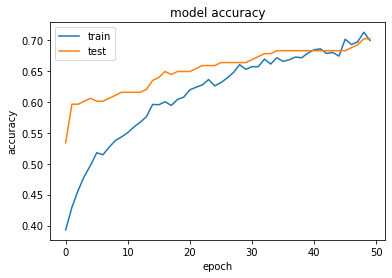

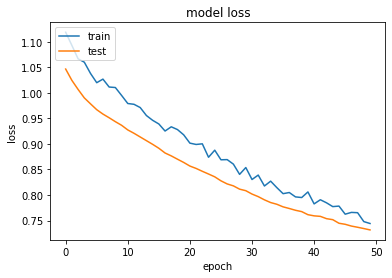

Iteration:4
=== Scores ===
Accuracy: 0.709957
Precision: 0.832092
Recall: 0.512280
F1 score: 0.502163
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.03      0.05        39
    Religion       0.81      0.55      0.65        53
      Racism       0.69      0.96      0.80       139

    accuracy                           0.71       231
   macro avg       0.83      0.51      0.50       231
weighted avg       0.77      0.71      0.64       231

=== Confusion Matrix ===
[[  1   2  36]
 [  0  29  24]
 [  0   5 134]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_74 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_60 (Dropout)         (None, 8, 4)              

1868/1868 [==============================] - 0s 106us/step - loss: 0.7543 - accuracy: 0.6986 - val_loss: 0.8043 - val_accuracy: 0.6683
Epoch 45/50
1868/1868 [==============================] - 0s 108us/step - loss: 0.7579 - accuracy: 0.6911 - val_loss: 0.7995 - val_accuracy: 0.6683
Epoch 46/50
1868/1868 [==============================] - 0s 112us/step - loss: 0.7683 - accuracy: 0.6890 - val_loss: 0.7951 - val_accuracy: 0.6683
Epoch 47/50
1868/1868 [==============================] - 0s 105us/step - loss: 0.7451 - accuracy: 0.7024 - val_loss: 0.7954 - val_accuracy: 0.6731
Epoch 48/50
1868/1868 [==============================] - 0s 106us/step - loss: 0.7529 - accuracy: 0.6906 - val_loss: 0.7949 - val_accuracy: 0.6683
Epoch 49/50
1868/1868 [==============================] - 0s 105us/step - loss: 0.7432 - accuracy: 0.7093 - val_loss: 0.7889 - val_accuracy: 0.6683
Epoch 50/50
1868/1868 [==============================] - 0s 106us/step - loss: 0.7458 - accuracy: 0.6911 - val_loss: 0.7877 - val_

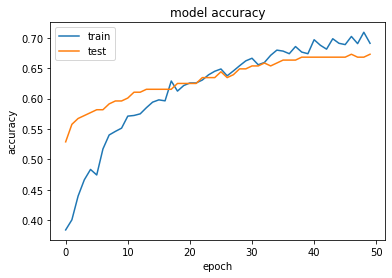

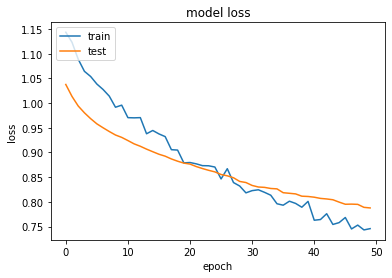

Iteration:5
=== Scores ===
Accuracy: 0.718615
Precision: 0.848940
Recall: 0.517076
F1 score: 0.509536
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.03      0.05        39
    Religion       0.85      0.55      0.67        53
      Racism       0.69      0.98      0.81       139

    accuracy                           0.72       231
   macro avg       0.85      0.52      0.51       231
weighted avg       0.78      0.72      0.65       231

=== Confusion Matrix ===
[[  1   2  36]
 [  0  29  24]
 [  0   3 136]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_75 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_62 (Dropout)         (None, 8, 4)              

1868/1868 [==============================] - 0s 116us/step - loss: 0.7497 - accuracy: 0.6954 - val_loss: 0.7821 - val_accuracy: 0.6779
Epoch 45/50
1868/1868 [==============================] - 0s 114us/step - loss: 0.7448 - accuracy: 0.7109 - val_loss: 0.7831 - val_accuracy: 0.6731
Epoch 46/50
1868/1868 [==============================] - 0s 114us/step - loss: 0.7447 - accuracy: 0.7040 - val_loss: 0.7744 - val_accuracy: 0.6827
Epoch 47/50
1868/1868 [==============================] - 0s 113us/step - loss: 0.7370 - accuracy: 0.7099 - val_loss: 0.7750 - val_accuracy: 0.6731
Epoch 48/50
1868/1868 [==============================] - 0s 116us/step - loss: 0.7404 - accuracy: 0.7034 - val_loss: 0.7733 - val_accuracy: 0.6779
Epoch 49/50
1868/1868 [==============================] - 0s 114us/step - loss: 0.7378 - accuracy: 0.6970 - val_loss: 0.7708 - val_accuracy: 0.6827
Epoch 50/50
1868/1868 [==============================] - 0s 115us/step - loss: 0.7153 - accuracy: 0.7152 - val_loss: 0.7686 - val_

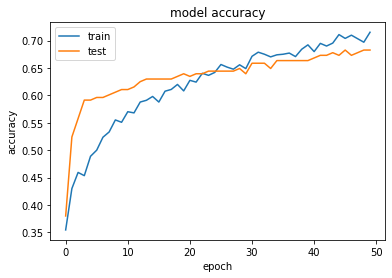

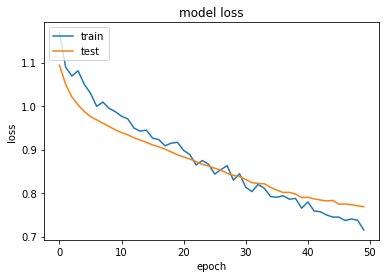

Iteration:6
=== Scores ===
Accuracy: 0.709957
Precision: 0.510731
Recall: 0.498348
F1 score: 0.481982
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.00      0.00      0.00        39
    Religion       0.84      0.51      0.64        53
      Racism       0.69      0.99      0.81       139

    accuracy                           0.71       231
   macro avg       0.51      0.50      0.48       231
weighted avg       0.61      0.71      0.63       231

=== Confusion Matrix ===
[[  0   3  36]
 [  0  27  26]
 [  0   2 137]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_76 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_64 (Dropout)         (None, 8, 4)              

1868/1868 [==============================] - 0s 113us/step - loss: 0.7605 - accuracy: 0.6922 - val_loss: 0.8184 - val_accuracy: 0.6442
Epoch 45/50
1868/1868 [==============================] - 0s 116us/step - loss: 0.7676 - accuracy: 0.6804 - val_loss: 0.8150 - val_accuracy: 0.6442
Epoch 46/50
1868/1868 [==============================] - 0s 121us/step - loss: 0.7517 - accuracy: 0.6991 - val_loss: 0.8093 - val_accuracy: 0.6442
Epoch 47/50
1868/1868 [==============================] - 0s 112us/step - loss: 0.7442 - accuracy: 0.6949 - val_loss: 0.8072 - val_accuracy: 0.6442
Epoch 48/50
1868/1868 [==============================] - 0s 116us/step - loss: 0.7387 - accuracy: 0.6981 - val_loss: 0.8109 - val_accuracy: 0.6442
Epoch 49/50
1868/1868 [==============================] - 0s 113us/step - loss: 0.7424 - accuracy: 0.7072 - val_loss: 0.8074 - val_accuracy: 0.6442
Epoch 50/50
1868/1868 [==============================] - 0s 112us/step - loss: 0.7409 - accuracy: 0.6986 - val_loss: 0.7997 - val_

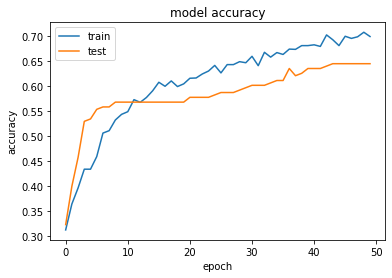

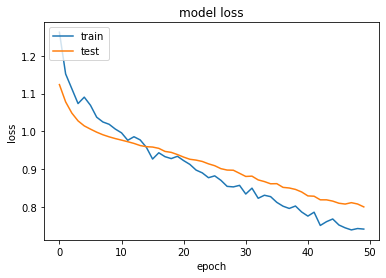

Iteration:7
=== Scores ===
Accuracy: 0.692641
Precision: 0.791919
Recall: 0.486113
F1 score: 0.502718
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.80      0.10      0.18        39
    Religion       0.91      0.38      0.53        53
      Racism       0.67      0.98      0.79       139

    accuracy                           0.69       231
   macro avg       0.79      0.49      0.50       231
weighted avg       0.74      0.69      0.63       231

=== Confusion Matrix ===
[[  4   0  35]
 [  0  20  33]
 [  1   2 136]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_77 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_66 (Dropout)         (None, 8, 4)              

1869/1869 [==============================] - 0s 109us/step - loss: 0.7610 - accuracy: 0.6827 - val_loss: 0.8100 - val_accuracy: 0.6346
Epoch 45/50
1869/1869 [==============================] - 0s 110us/step - loss: 0.7690 - accuracy: 0.6731 - val_loss: 0.8058 - val_accuracy: 0.6346
Epoch 46/50
1869/1869 [==============================] - 0s 108us/step - loss: 0.7537 - accuracy: 0.6913 - val_loss: 0.8052 - val_accuracy: 0.6346
Epoch 47/50
1869/1869 [==============================] - 0s 109us/step - loss: 0.7540 - accuracy: 0.6843 - val_loss: 0.8036 - val_accuracy: 0.6346
Epoch 48/50
1869/1869 [==============================] - 0s 111us/step - loss: 0.7630 - accuracy: 0.6849 - val_loss: 0.8056 - val_accuracy: 0.6442
Epoch 49/50
1869/1869 [==============================] - 0s 110us/step - loss: 0.7488 - accuracy: 0.6918 - val_loss: 0.8018 - val_accuracy: 0.6442
Epoch 50/50
1869/1869 [==============================] - 0s 110us/step - loss: 0.7287 - accuracy: 0.7030 - val_loss: 0.7955 - val_

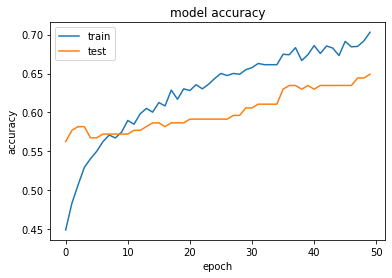

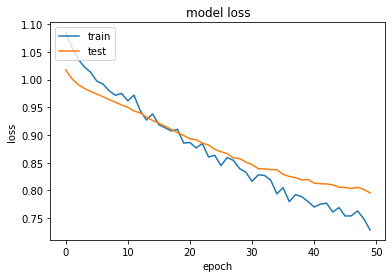

Iteration:8
=== Scores ===
Accuracy: 0.669565
Precision: 0.472976
Recall: 0.445720
F1 score: 0.427414
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.17      0.03      0.05        38
    Religion       0.55      0.34      0.42        53
      Racism       0.71      0.97      0.82       139

    accuracy                           0.67       230
   macro avg       0.47      0.45      0.43       230
weighted avg       0.58      0.67      0.60       230

=== Confusion Matrix ===
[[  1  11  26]
 [  5  18  30]
 [  0   4 135]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_78 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_68 (Dropout)         (None, 8, 4)              

1869/1869 [==============================] - 0s 111us/step - loss: 0.7774 - accuracy: 0.6747 - val_loss: 0.8129 - val_accuracy: 0.6442
Epoch 45/50
1869/1869 [==============================] - 0s 111us/step - loss: 0.7667 - accuracy: 0.6795 - val_loss: 0.8171 - val_accuracy: 0.6394
Epoch 46/50
1869/1869 [==============================] - 0s 111us/step - loss: 0.7767 - accuracy: 0.6779 - val_loss: 0.8168 - val_accuracy: 0.6394
Epoch 47/50
1869/1869 [==============================] - 0s 116us/step - loss: 0.7586 - accuracy: 0.6822 - val_loss: 0.8133 - val_accuracy: 0.6490
Epoch 48/50
1869/1869 [==============================] - 0s 111us/step - loss: 0.7664 - accuracy: 0.6790 - val_loss: 0.8114 - val_accuracy: 0.6538
Epoch 49/50
1869/1869 [==============================] - 0s 109us/step - loss: 0.7431 - accuracy: 0.6923 - val_loss: 0.8032 - val_accuracy: 0.6635
Epoch 50/50
1869/1869 [==============================] - 0s 113us/step - loss: 0.7471 - accuracy: 0.6907 - val_loss: 0.8030 - val_

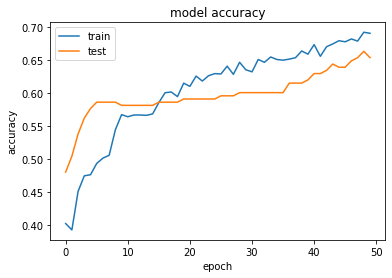

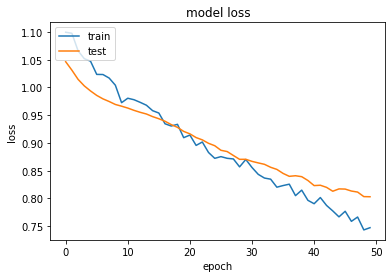

Iteration:9
=== Scores ===
Accuracy: 0.691304
Precision: 0.582200
Recall: 0.471939
F1 score: 0.468795
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.33      0.05      0.09        38
    Religion       0.71      0.38      0.50        52
      Racism       0.70      0.98      0.82       140

    accuracy                           0.69       230
   macro avg       0.58      0.47      0.47       230
weighted avg       0.64      0.69      0.62       230

=== Confusion Matrix ===
[[  2   6  30]
 [  3  20  29]
 [  1   2 137]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_79 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_70 (Dropout)         (None, 8, 4)              

1869/1869 [==============================] - 0s 112us/step - loss: 0.7656 - accuracy: 0.6934 - val_loss: 0.8231 - val_accuracy: 0.6538
Epoch 45/50
1869/1869 [==============================] - 0s 116us/step - loss: 0.7627 - accuracy: 0.6913 - val_loss: 0.8189 - val_accuracy: 0.6587
Epoch 46/50
1869/1869 [==============================] - 0s 112us/step - loss: 0.7763 - accuracy: 0.6790 - val_loss: 0.8189 - val_accuracy: 0.6538
Epoch 47/50
1869/1869 [==============================] - 0s 113us/step - loss: 0.7581 - accuracy: 0.6923 - val_loss: 0.8140 - val_accuracy: 0.6538
Epoch 48/50
1869/1869 [==============================] - 0s 110us/step - loss: 0.7559 - accuracy: 0.6881 - val_loss: 0.8091 - val_accuracy: 0.6538
Epoch 49/50
1869/1869 [==============================] - 0s 112us/step - loss: 0.7696 - accuracy: 0.6886 - val_loss: 0.8095 - val_accuracy: 0.6490
Epoch 50/50
1869/1869 [==============================] - 0s 117us/step - loss: 0.7481 - accuracy: 0.6982 - val_loss: 0.8038 - val_

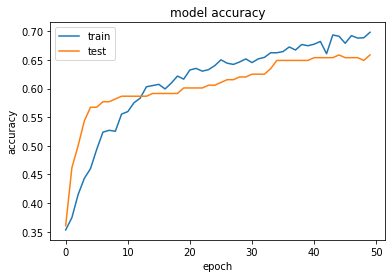

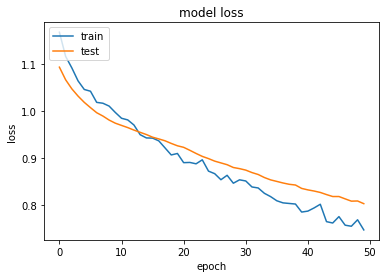

Iteration:10
=== Scores ===
Accuracy: 0.726087
Precision: 0.781626
Recall: 0.517525
F1 score: 0.530114
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.75      0.08      0.14        38
    Religion       0.89      0.48      0.62        52
      Racism       0.70      0.99      0.82       140

    accuracy                           0.73       230
   macro avg       0.78      0.52      0.53       230
weighted avg       0.75      0.73      0.67       230

=== Confusion Matrix ===
[[  3   2  33]
 [  1  25  26]
 [  0   1 139]]




Averages
Accuracy: 0.7013363448146057
Precision: 0.6756541913497169
Recall: 0.4926350377079089
F1 measure: 0.4906667111507736
Confusion Matrix

[[  2.3   3.8  32.6]
 [  2.1  23.2  27.5]
 [  0.6   2.3 136.3]]


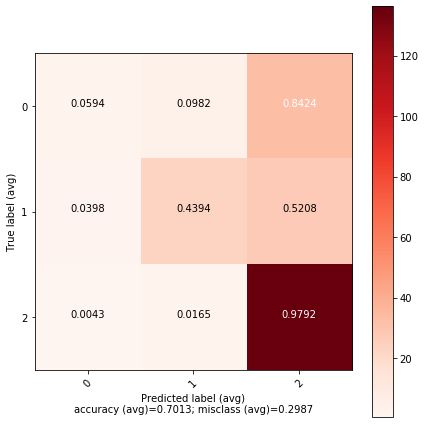

In [114]:
reset_seeds()
cnn = CNN1D(xTrain, yTrain, target_names, class_names, 'CNN1D (Glove) ',  _epochs = 50, _verbose=2, graph = True, _optimizer = RMSprop(lr=0.0001))

In [119]:
from keras_self_attention import SeqSelfAttention
def CNN1D_MaxPooling(X, y, _target_names = [], _class_names = [], algoname= ' ', _loss='categorical_crossentropy', _optimizer = Adam(lr=0.0001), _metrics=['accuracy'], _epochs = 25 , _validation_split = 0.1, _batch_size = 2, _verbose = 2, graph = False, _kernel_regularizer=l2(0.0001), _bias_regularizer=l2(0.0001)):
    print("--------------- CNN1D ---------------")  

    n_classes = 3
    
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    
    
    count = 1
    for i, (train_index, test_index) in enumerate(kfold.split(X, y.argmax(axis=1))):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        if X_train.ndim == 2:
            xTrain,xTest,_input_shape = Shape_Reshaper(X_train, X_test)
        else:
            xTrain,xTest,_input_shape = Shape_Reshaper_Vec(X_train, X_test)
        
        
            
        model = Sequential()

        model.add(Conv1D(4, kernel_size=3, strides= 3, padding='same',activation='elu', input_shape=_input_shape,kernel_regularizer= _kernel_regularizer, bias_regularizer= _bias_regularizer))
        model.add(Dropout(0.5))
        
        
        model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid', data_format='channels_last'))
        model.add(Dropout(0.5))
        
        
        model.add(Dense(8 ,activation='elu'))
        model.add(Dropout(0.5))

        
        
        
        model.add(Flatten()) 
        model.add(Dense(n_classes ,activation='softmax'))
        model.summary()


        model.compile(loss=_loss, optimizer=_optimizer, metrics=_metrics)
        
        checkpoint_filepath = 'checkpoint.txt'
        callbacks = [ EarlyStoppingByLossVal(monitor='val_loss', value=.20, verbose=1),
                      ModelCheckpoint(filepath = checkpoint_filepath, monitor='val_loss', save_best_only=True, verbose=0)
                     ]
        
        
        
        history = model.fit(xTrain.astype('float32'), y_train, epochs=_epochs,validation_split = _validation_split,callbacks=callbacks)
        
        # save model and architecture to single file
        model.save("model.h5")
        print("Saved model to disk")
        

        score = model.evaluate(xTest, y_test, verbose=1)
        print("Test Score:", score[0])
        print("Test Accuracy:", score[1])

        accuracy = model.evaluate(xTest, y_test,  verbose=_verbose)
        
        y_pred = model.predict_classes(xTest)
        
        
        if graph:
            Generate_Graph(history)
            
    
        
        
        
        print("Iteration:" + str(count))
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test.argmax(axis=1), y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test.argmax(axis=1), y_pred, average='macro' )
        print('Precision: %f' % precision)
        recall = recall_score(y_test.argmax(axis=1), y_pred, average='macro')
        print('Recall: %f' % recall)
        f1 = f1_score(y_test.argmax(axis=1), y_pred, average='macro')
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        

        print("=== Classification Report ===")
        target_names = _target_names
        print(classification_report(y_test.argmax(axis=1), y_pred, target_names=target_names))
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test.argmax(axis=1), y_pred))
        cfmean.append(confusion_matrix(y_test.argmax(axis=1), y_pred))
  
        print('\n')
        count = count + 1
        
        
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = _class_names
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    return model, kfold        
        

RANDOM SEEDS RESET
--------------- CNN1D ---------------
(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_85 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_87 (Dropout)         (None, 8, 4)              0         
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 4, 4)              0         
_________________________________________________________________
dropout_88 (Dropout)         (None, 4, 4)              0         
_________________________________________________________________
dense_156 (Dense)            (None, 4, 8)              40        
_________________________________________________________________
dropout_89 (Dropout)         (None, 4, 8)              0

Epoch 46/120
1868/1868 [==============================] - 0s 125us/step - loss: 0.9340 - accuracy: 0.6204 - val_loss: 0.9362 - val_accuracy: 0.5865
Epoch 47/120
1868/1868 [==============================] - 0s 125us/step - loss: 0.9336 - accuracy: 0.6006 - val_loss: 0.9363 - val_accuracy: 0.5865
Epoch 48/120
1868/1868 [==============================] - 0s 128us/step - loss: 0.9280 - accuracy: 0.6140 - val_loss: 0.9337 - val_accuracy: 0.5913
Epoch 49/120
1868/1868 [==============================] - 0s 125us/step - loss: 0.9148 - accuracy: 0.6183 - val_loss: 0.9323 - val_accuracy: 0.5913
Epoch 50/120
1868/1868 [==============================] - 0s 128us/step - loss: 0.9224 - accuracy: 0.6151 - val_loss: 0.9330 - val_accuracy: 0.5913
Epoch 51/120
1868/1868 [==============================] - 0s 122us/step - loss: 0.9215 - accuracy: 0.6183 - val_loss: 0.9313 - val_accuracy: 0.5913
Epoch 52/120
1868/1868 [==============================] - 0s 126us/step - loss: 0.9203 - accuracy: 0.6156 - val_

1868/1868 [==============================] - 0s 127us/step - loss: 0.8352 - accuracy: 0.6494 - val_loss: 0.8395 - val_accuracy: 0.6442
Epoch 102/120
1868/1868 [==============================] - 0s 124us/step - loss: 0.8586 - accuracy: 0.6483 - val_loss: 0.8350 - val_accuracy: 0.6442
Epoch 103/120
1868/1868 [==============================] - 0s 125us/step - loss: 0.8369 - accuracy: 0.6579 - val_loss: 0.8318 - val_accuracy: 0.6442
Epoch 104/120
1868/1868 [==============================] - 0s 124us/step - loss: 0.8449 - accuracy: 0.6542 - val_loss: 0.8282 - val_accuracy: 0.6442
Epoch 105/120
1868/1868 [==============================] - 0s 124us/step - loss: 0.8505 - accuracy: 0.6445 - val_loss: 0.8293 - val_accuracy: 0.6442
Epoch 106/120
1868/1868 [==============================] - 0s 126us/step - loss: 0.8307 - accuracy: 0.6649 - val_loss: 0.8257 - val_accuracy: 0.6442
Epoch 107/120
1868/1868 [==============================] - 0s 124us/step - loss: 0.8349 - accuracy: 0.6563 - val_loss: 0

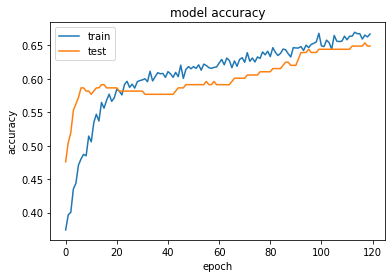

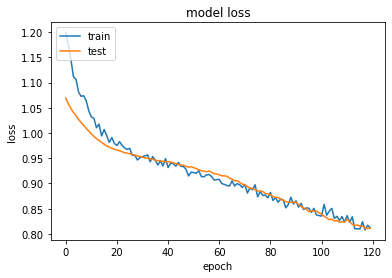

Iteration:1
=== Scores ===
Accuracy: 0.696970
Precision: 0.520153
Recall: 0.479481
F1 score: 0.466278
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.00      0.00      0.00        39
    Religion       0.89      0.45      0.60        53
      Racism       0.67      0.99      0.80       139

    accuracy                           0.70       231
   macro avg       0.52      0.48      0.47       231
weighted avg       0.61      0.70      0.62       231

=== Confusion Matrix ===
[[  0   1  38]
 [  0  24  29]
 [  0   2 137]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_86 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_90 (Dropout)         (None, 8, 4)              

1868/1868 [==============================] - 0s 127us/step - loss: 0.9294 - accuracy: 0.6156 - val_loss: 0.9582 - val_accuracy: 0.5673
Epoch 43/120
1868/1868 [==============================] - 0s 129us/step - loss: 0.9322 - accuracy: 0.6156 - val_loss: 0.9571 - val_accuracy: 0.5673
Epoch 44/120
1868/1868 [==============================] - 0s 128us/step - loss: 0.9269 - accuracy: 0.6167 - val_loss: 0.9552 - val_accuracy: 0.5673
Epoch 45/120
1868/1868 [==============================] - 0s 126us/step - loss: 0.9201 - accuracy: 0.6226 - val_loss: 0.9551 - val_accuracy: 0.5673
Epoch 46/120
1868/1868 [==============================] - 0s 126us/step - loss: 0.9214 - accuracy: 0.6108 - val_loss: 0.9550 - val_accuracy: 0.5673
Epoch 47/120
1868/1868 [==============================] - 0s 127us/step - loss: 0.9115 - accuracy: 0.6167 - val_loss: 0.9519 - val_accuracy: 0.5673
Epoch 48/120
1868/1868 [==============================] - 0s 129us/step - loss: 0.9169 - accuracy: 0.6172 - val_loss: 0.9513 

1868/1868 [==============================] - 0s 130us/step - loss: 0.8329 - accuracy: 0.6563 - val_loss: 0.8610 - val_accuracy: 0.6250
Epoch 98/120
1868/1868 [==============================] - 0s 126us/step - loss: 0.8459 - accuracy: 0.6494 - val_loss: 0.8641 - val_accuracy: 0.6250
Epoch 99/120
1868/1868 [==============================] - 0s 130us/step - loss: 0.8313 - accuracy: 0.6601 - val_loss: 0.8588 - val_accuracy: 0.6298
Epoch 100/120
1868/1868 [==============================] - 0s 125us/step - loss: 0.8159 - accuracy: 0.6681 - val_loss: 0.8591 - val_accuracy: 0.6250
Epoch 101/120
1868/1868 [==============================] - 0s 129us/step - loss: 0.8373 - accuracy: 0.6520 - val_loss: 0.8563 - val_accuracy: 0.6298
Epoch 102/120
1868/1868 [==============================] - 0s 127us/step - loss: 0.8273 - accuracy: 0.6590 - val_loss: 0.8534 - val_accuracy: 0.6346
Epoch 103/120
1868/1868 [==============================] - 0s 125us/step - loss: 0.8218 - accuracy: 0.6601 - val_loss: 0.8

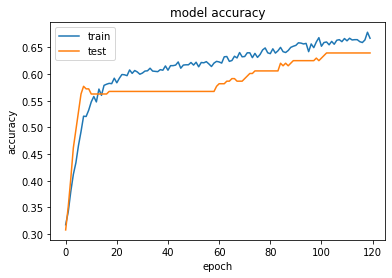

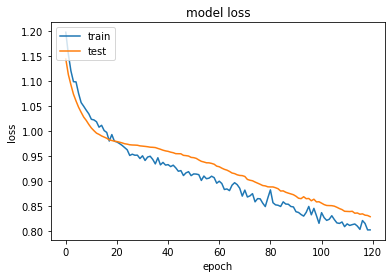

Iteration:2
=== Scores ===
Accuracy: 0.714286
Precision: 0.879934
Recall: 0.507520
F1 score: 0.521753
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.08      0.14        39
    Religion       0.96      0.45      0.62        53
      Racism       0.68      0.99      0.81       139

    accuracy                           0.71       231
   macro avg       0.88      0.51      0.52       231
weighted avg       0.80      0.71      0.65       231

=== Confusion Matrix ===
[[  3   0  36]
 [  0  24  29]
 [  0   1 138]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_87 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_93 (Dropout)         (None, 8, 4)              

1868/1868 [==============================] - 0s 128us/step - loss: 0.9298 - accuracy: 0.6097 - val_loss: 0.9452 - val_accuracy: 0.5625
Epoch 43/120
1868/1868 [==============================] - 0s 134us/step - loss: 0.9051 - accuracy: 0.6215 - val_loss: 0.9444 - val_accuracy: 0.5673
Epoch 44/120
1868/1868 [==============================] - 0s 130us/step - loss: 0.9195 - accuracy: 0.6113 - val_loss: 0.9426 - val_accuracy: 0.5673
Epoch 45/120
1868/1868 [==============================] - 0s 131us/step - loss: 0.9232 - accuracy: 0.6103 - val_loss: 0.9404 - val_accuracy: 0.5673
Epoch 46/120
1868/1868 [==============================] - 0s 128us/step - loss: 0.9221 - accuracy: 0.6092 - val_loss: 0.9382 - val_accuracy: 0.5673
Epoch 47/120
1868/1868 [==============================] - 0s 127us/step - loss: 0.9157 - accuracy: 0.6130 - val_loss: 0.9371 - val_accuracy: 0.5673
Epoch 48/120
1868/1868 [==============================] - 0s 131us/step - loss: 0.9001 - accuracy: 0.6183 - val_loss: 0.9362 

1868/1868 [==============================] - 0s 127us/step - loss: 0.8337 - accuracy: 0.6467 - val_loss: 0.8467 - val_accuracy: 0.6250
Epoch 98/120
1868/1868 [==============================] - 0s 130us/step - loss: 0.8373 - accuracy: 0.6606 - val_loss: 0.8462 - val_accuracy: 0.6250
Epoch 99/120
1868/1868 [==============================] - 0s 129us/step - loss: 0.8251 - accuracy: 0.6526 - val_loss: 0.8440 - val_accuracy: 0.6250
Epoch 100/120
1868/1868 [==============================] - 0s 131us/step - loss: 0.8360 - accuracy: 0.6547 - val_loss: 0.8421 - val_accuracy: 0.6250
Epoch 101/120
1868/1868 [==============================] - 0s 128us/step - loss: 0.8292 - accuracy: 0.6520 - val_loss: 0.8414 - val_accuracy: 0.6298
Epoch 102/120
1868/1868 [==============================] - 0s 128us/step - loss: 0.8371 - accuracy: 0.6536 - val_loss: 0.8400 - val_accuracy: 0.6298
Epoch 103/120
1868/1868 [==============================] - 0s 130us/step - loss: 0.8296 - accuracy: 0.6547 - val_loss: 0.8

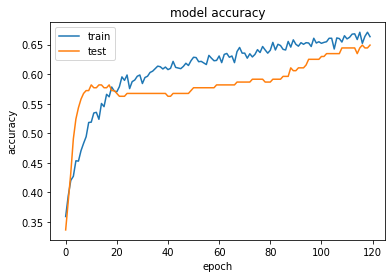

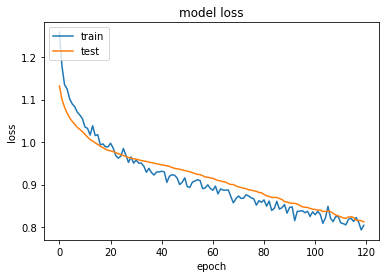

Iteration:3
=== Scores ===
Accuracy: 0.744589
Precision: 0.876254
Recall: 0.550921
F1 score: 0.543619
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.03      0.05        39
    Religion       0.92      0.64      0.76        53
      Racism       0.71      0.99      0.83       139

    accuracy                           0.74       231
   macro avg       0.88      0.55      0.54       231
weighted avg       0.81      0.74      0.68       231

=== Confusion Matrix ===
[[  1   1  37]
 [  0  34  19]
 [  0   2 137]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_88 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_96 (Dropout)         (None, 8, 4)              

1868/1868 [==============================] - 0s 142us/step - loss: 0.8837 - accuracy: 0.6124 - val_loss: 0.8638 - val_accuracy: 0.6250
Epoch 43/120
1868/1868 [==============================] - 0s 140us/step - loss: 0.8853 - accuracy: 0.6253 - val_loss: 0.8606 - val_accuracy: 0.6250
Epoch 44/120
1868/1868 [==============================] - 0s 143us/step - loss: 0.8897 - accuracy: 0.6221 - val_loss: 0.8563 - val_accuracy: 0.6346
Epoch 45/120
1868/1868 [==============================] - 0s 153us/step - loss: 0.8868 - accuracy: 0.6301 - val_loss: 0.8540 - val_accuracy: 0.6394
Epoch 46/120
1868/1868 [==============================] - 0s 162us/step - loss: 0.8759 - accuracy: 0.6306 - val_loss: 0.8516 - val_accuracy: 0.6394
Epoch 47/120
1868/1868 [==============================] - 0s 153us/step - loss: 0.8724 - accuracy: 0.6269 - val_loss: 0.8491 - val_accuracy: 0.6394
Epoch 48/120
1868/1868 [==============================] - 0s 149us/step - loss: 0.8778 - accuracy: 0.6210 - val_loss: 0.8459 

1868/1868 [==============================] - 0s 151us/step - loss: 0.7849 - accuracy: 0.6740 - val_loss: 0.7483 - val_accuracy: 0.6923
Epoch 98/120
1868/1868 [==============================] - 0s 150us/step - loss: 0.7954 - accuracy: 0.6611 - val_loss: 0.7492 - val_accuracy: 0.6923
Epoch 99/120
1868/1868 [==============================] - 0s 155us/step - loss: 0.7880 - accuracy: 0.6547 - val_loss: 0.7470 - val_accuracy: 0.6923
Epoch 100/120
1868/1868 [==============================] - 0s 158us/step - loss: 0.8035 - accuracy: 0.6601 - val_loss: 0.7502 - val_accuracy: 0.6875
Epoch 101/120
1868/1868 [==============================] - 0s 151us/step - loss: 0.7921 - accuracy: 0.6617 - val_loss: 0.7475 - val_accuracy: 0.6923
Epoch 102/120
1868/1868 [==============================] - 0s 150us/step - loss: 0.7889 - accuracy: 0.6649 - val_loss: 0.7456 - val_accuracy: 0.6923
Epoch 103/120
1868/1868 [==============================] - 0s 161us/step - loss: 0.8017 - accuracy: 0.6483 - val_loss: 0.7

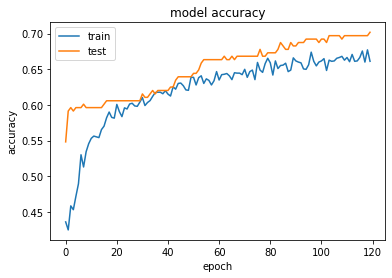

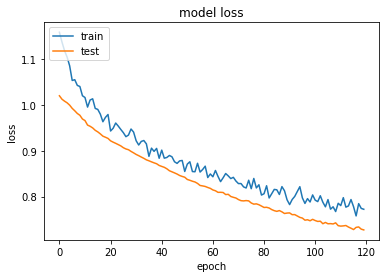

Iteration:4
=== Scores ===
Accuracy: 0.692641
Precision: 0.807757
Recall: 0.497163
F1 score: 0.493754
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.05      0.10        39
    Religion       0.74      0.49      0.59        53
      Racism       0.68      0.95      0.79       139

    accuracy                           0.69       231
   macro avg       0.81      0.50      0.49       231
weighted avg       0.75      0.69      0.63       231

=== Confusion Matrix ===
[[  2   2  35]
 [  0  26  27]
 [  0   7 132]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_89 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_99 (Dropout)         (None, 8, 4)              

1868/1868 [==============================] - 0s 163us/step - loss: 0.9227 - accuracy: 0.6033 - val_loss: 0.8944 - val_accuracy: 0.6010
Epoch 43/120
1868/1868 [==============================] - 0s 162us/step - loss: 0.9353 - accuracy: 0.5921 - val_loss: 0.8935 - val_accuracy: 0.5913
Epoch 44/120
1868/1868 [==============================] - 0s 164us/step - loss: 0.9328 - accuracy: 0.6022 - val_loss: 0.8923 - val_accuracy: 0.5913
Epoch 45/120
1868/1868 [==============================] - 0s 164us/step - loss: 0.9248 - accuracy: 0.6033 - val_loss: 0.8903 - val_accuracy: 0.5962
Epoch 46/120
1868/1868 [==============================] - 0s 166us/step - loss: 0.9210 - accuracy: 0.6001 - val_loss: 0.8888 - val_accuracy: 0.5962
Epoch 47/120
1868/1868 [==============================] - 0s 161us/step - loss: 0.9144 - accuracy: 0.6022 - val_loss: 0.8874 - val_accuracy: 0.5962
Epoch 48/120
1868/1868 [==============================] - 0s 159us/step - loss: 0.9174 - accuracy: 0.6076 - val_loss: 0.8866 

1868/1868 [==============================] - 0s 155us/step - loss: 0.8493 - accuracy: 0.6376 - val_loss: 0.7935 - val_accuracy: 0.6635
Epoch 98/120
1868/1868 [==============================] - 0s 153us/step - loss: 0.8286 - accuracy: 0.6472 - val_loss: 0.7921 - val_accuracy: 0.6635
Epoch 99/120
1868/1868 [==============================] - 0s 155us/step - loss: 0.8187 - accuracy: 0.6494 - val_loss: 0.7916 - val_accuracy: 0.6587
Epoch 100/120
1868/1868 [==============================] - 0s 160us/step - loss: 0.8319 - accuracy: 0.6408 - val_loss: 0.7889 - val_accuracy: 0.6635
Epoch 101/120
1868/1868 [==============================] - 0s 164us/step - loss: 0.8191 - accuracy: 0.6494 - val_loss: 0.7857 - val_accuracy: 0.6635
Epoch 102/120
1868/1868 [==============================] - 0s 161us/step - loss: 0.8253 - accuracy: 0.6488 - val_loss: 0.7839 - val_accuracy: 0.6635
Epoch 103/120
1868/1868 [==============================] - 0s 154us/step - loss: 0.8294 - accuracy: 0.6488 - val_loss: 0.7

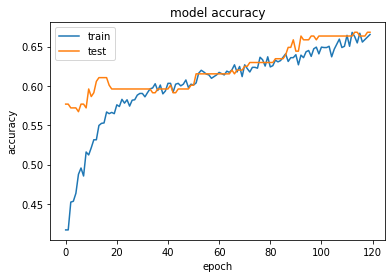

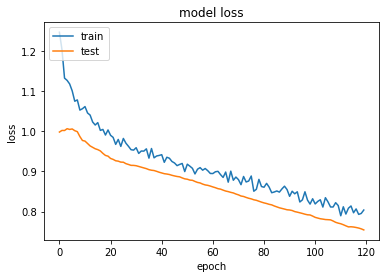

Iteration:5
=== Scores ===
Accuracy: 0.705628
Precision: 0.817669
Recall: 0.494317
F1 score: 0.482291
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.03      0.05        39
    Religion       0.76      0.47      0.58        53
      Racism       0.70      0.99      0.82       139

    accuracy                           0.71       231
   macro avg       0.82      0.49      0.48       231
weighted avg       0.76      0.71      0.63       231

=== Confusion Matrix ===
[[  1   6  32]
 [  0  25  28]
 [  0   2 137]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_90 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_102 (Dropout)        (None, 8, 4)              

1868/1868 [==============================] - 0s 158us/step - loss: 0.9166 - accuracy: 0.6167 - val_loss: 0.8789 - val_accuracy: 0.6010
Epoch 43/120
1868/1868 [==============================] - 0s 160us/step - loss: 0.9100 - accuracy: 0.6242 - val_loss: 0.8754 - val_accuracy: 0.6058
Epoch 44/120
1868/1868 [==============================] - 0s 157us/step - loss: 0.9072 - accuracy: 0.6178 - val_loss: 0.8743 - val_accuracy: 0.5962
Epoch 45/120
1868/1868 [==============================] - 0s 158us/step - loss: 0.9141 - accuracy: 0.6162 - val_loss: 0.8742 - val_accuracy: 0.5962
Epoch 46/120
1868/1868 [==============================] - 0s 156us/step - loss: 0.9011 - accuracy: 0.6263 - val_loss: 0.8722 - val_accuracy: 0.5962
Epoch 47/120
1868/1868 [==============================] - 0s 153us/step - loss: 0.8992 - accuracy: 0.6204 - val_loss: 0.8696 - val_accuracy: 0.5962
Epoch 48/120
1868/1868 [==============================] - 0s 149us/step - loss: 0.8967 - accuracy: 0.6231 - val_loss: 0.8664 

1868/1868 [==============================] - 0s 137us/step - loss: 0.8127 - accuracy: 0.6718 - val_loss: 0.7840 - val_accuracy: 0.6827
Epoch 98/120
1868/1868 [==============================] - 0s 138us/step - loss: 0.8137 - accuracy: 0.6606 - val_loss: 0.7788 - val_accuracy: 0.6827
Epoch 99/120
1868/1868 [==============================] - 0s 138us/step - loss: 0.8185 - accuracy: 0.6708 - val_loss: 0.7810 - val_accuracy: 0.6875
Epoch 100/120
1868/1868 [==============================] - 0s 138us/step - loss: 0.7968 - accuracy: 0.6863 - val_loss: 0.7766 - val_accuracy: 0.6875
Epoch 101/120
1868/1868 [==============================] - 0s 140us/step - loss: 0.8130 - accuracy: 0.6772 - val_loss: 0.7728 - val_accuracy: 0.6875
Epoch 102/120
1868/1868 [==============================] - 0s 134us/step - loss: 0.8027 - accuracy: 0.6697 - val_loss: 0.7756 - val_accuracy: 0.6875
Epoch 103/120
1868/1868 [==============================] - 0s 136us/step - loss: 0.8044 - accuracy: 0.6756 - val_loss: 0.7

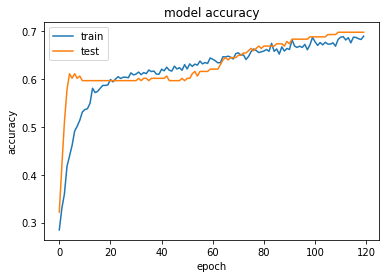

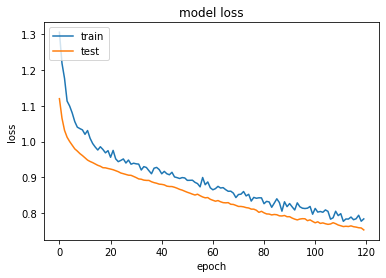

Iteration:6
=== Scores ===
Accuracy: 0.709957
Precision: 0.494591
Recall: 0.510022
F1 score: 0.488857
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.00      0.00      0.00        39
    Religion       0.79      0.57      0.66        53
      Racism       0.69      0.96      0.81       139

    accuracy                           0.71       231
   macro avg       0.49      0.51      0.49       231
weighted avg       0.60      0.71      0.64       231

=== Confusion Matrix ===
[[  0   3  36]
 [  0  30  23]
 [  0   5 134]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_91 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_105 (Dropout)        (None, 8, 4)              

1868/1868 [==============================] - 0s 130us/step - loss: 0.9267 - accuracy: 0.6049 - val_loss: 0.9022 - val_accuracy: 0.5769
Epoch 43/120
1868/1868 [==============================] - 0s 129us/step - loss: 0.9168 - accuracy: 0.6130 - val_loss: 0.9004 - val_accuracy: 0.5769
Epoch 44/120
1868/1868 [==============================] - 0s 129us/step - loss: 0.9231 - accuracy: 0.6065 - val_loss: 0.8989 - val_accuracy: 0.5769
Epoch 45/120
1868/1868 [==============================] - 0s 128us/step - loss: 0.9226 - accuracy: 0.6092 - val_loss: 0.8977 - val_accuracy: 0.5769
Epoch 46/120
1868/1868 [==============================] - 0s 129us/step - loss: 0.9081 - accuracy: 0.6140 - val_loss: 0.8964 - val_accuracy: 0.5769
Epoch 47/120
1868/1868 [==============================] - 0s 129us/step - loss: 0.9109 - accuracy: 0.6065 - val_loss: 0.8941 - val_accuracy: 0.5769
Epoch 48/120
1868/1868 [==============================] - 0s 130us/step - loss: 0.9175 - accuracy: 0.6087 - val_loss: 0.8917 

1868/1868 [==============================] - 0s 135us/step - loss: 0.8420 - accuracy: 0.6301 - val_loss: 0.8146 - val_accuracy: 0.6250
Epoch 98/120
1868/1868 [==============================] - 0s 134us/step - loss: 0.8453 - accuracy: 0.6365 - val_loss: 0.8118 - val_accuracy: 0.6250
Epoch 99/120
1868/1868 [==============================] - 0s 135us/step - loss: 0.8464 - accuracy: 0.6370 - val_loss: 0.8111 - val_accuracy: 0.6250
Epoch 100/120
1868/1868 [==============================] - 0s 134us/step - loss: 0.8276 - accuracy: 0.6376 - val_loss: 0.8079 - val_accuracy: 0.6250
Epoch 101/120
1868/1868 [==============================] - 0s 134us/step - loss: 0.8416 - accuracy: 0.6344 - val_loss: 0.8068 - val_accuracy: 0.6250
Epoch 102/120
1868/1868 [==============================] - 0s 131us/step - loss: 0.8415 - accuracy: 0.6296 - val_loss: 0.8066 - val_accuracy: 0.6298
Epoch 103/120
1868/1868 [==============================] - 0s 131us/step - loss: 0.8281 - accuracy: 0.6419 - val_loss: 0.8

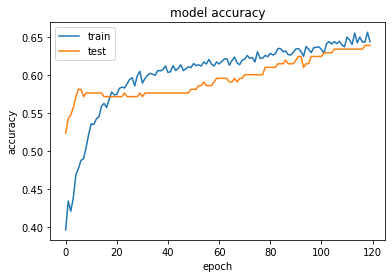

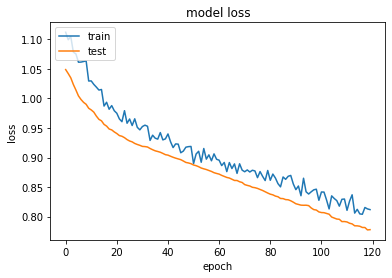

Iteration:7
=== Scores ===
Accuracy: 0.679654
Precision: 0.840214
Recall: 0.462730
F1 score: 0.463452
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.05      0.10        39
    Religion       0.86      0.36      0.51        53
      Racism       0.66      0.98      0.79       139

    accuracy                           0.68       231
   macro avg       0.84      0.46      0.46       231
weighted avg       0.76      0.68      0.61       231

=== Confusion Matrix ===
[[  2   0  37]
 [  0  19  34]
 [  0   3 136]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_92 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_108 (Dropout)        (None, 8, 4)              

1869/1869 [==============================] - 0s 127us/step - loss: 0.9204 - accuracy: 0.6137 - val_loss: 0.8948 - val_accuracy: 0.5865
Epoch 43/120
1869/1869 [==============================] - 0s 126us/step - loss: 0.8989 - accuracy: 0.6057 - val_loss: 0.8925 - val_accuracy: 0.5865
Epoch 44/120
1869/1869 [==============================] - 0s 125us/step - loss: 0.9130 - accuracy: 0.6158 - val_loss: 0.8911 - val_accuracy: 0.5913
Epoch 45/120
1869/1869 [==============================] - 0s 126us/step - loss: 0.9071 - accuracy: 0.6116 - val_loss: 0.8888 - val_accuracy: 0.5913
Epoch 46/120
1869/1869 [==============================] - 0s 125us/step - loss: 0.9096 - accuracy: 0.6126 - val_loss: 0.8861 - val_accuracy: 0.5962
Epoch 47/120
1869/1869 [==============================] - 0s 125us/step - loss: 0.9191 - accuracy: 0.6057 - val_loss: 0.8841 - val_accuracy: 0.6058
Epoch 48/120
1869/1869 [==============================] - 0s 125us/step - loss: 0.9033 - accuracy: 0.6185 - val_loss: 0.8826 

1869/1869 [==============================] - 0s 125us/step - loss: 0.8205 - accuracy: 0.6506 - val_loss: 0.7826 - val_accuracy: 0.6490
Epoch 98/120
1869/1869 [==============================] - 0s 126us/step - loss: 0.7957 - accuracy: 0.6602 - val_loss: 0.7788 - val_accuracy: 0.6538
Epoch 99/120
1869/1869 [==============================] - 0s 125us/step - loss: 0.8114 - accuracy: 0.6608 - val_loss: 0.7764 - val_accuracy: 0.6538
Epoch 100/120
1869/1869 [==============================] - 0s 126us/step - loss: 0.8132 - accuracy: 0.6512 - val_loss: 0.7763 - val_accuracy: 0.6538
Epoch 101/120
1869/1869 [==============================] - 0s 125us/step - loss: 0.8075 - accuracy: 0.6581 - val_loss: 0.7795 - val_accuracy: 0.6538
Epoch 102/120
1869/1869 [==============================] - 0s 124us/step - loss: 0.8001 - accuracy: 0.6619 - val_loss: 0.7720 - val_accuracy: 0.6538
Epoch 103/120
1869/1869 [==============================] - 0s 125us/step - loss: 0.7896 - accuracy: 0.6752 - val_loss: 0.7

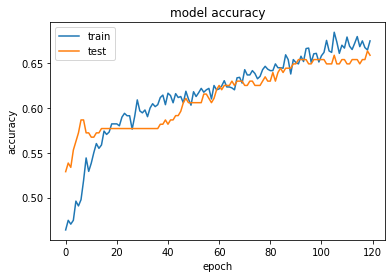

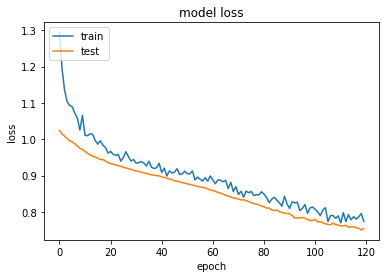

Iteration:8
=== Scores ===
Accuracy: 0.700000
Precision: 0.472700
Recall: 0.487263
F1 score: 0.465027
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.00      0.00      0.00        38
    Religion       0.72      0.49      0.58        53
      Racism       0.70      0.97      0.81       139

    accuracy                           0.70       230
   macro avg       0.47      0.49      0.47       230
weighted avg       0.59      0.70      0.62       230

=== Confusion Matrix ===
[[  0   6  32]
 [  0  26  27]
 [  0   4 135]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_93 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_111 (Dropout)        (None, 8, 4)              

1869/1869 [==============================] - 0s 135us/step - loss: 0.9058 - accuracy: 0.6239 - val_loss: 0.9000 - val_accuracy: 0.6154
Epoch 43/120
1869/1869 [==============================] - 0s 132us/step - loss: 0.9076 - accuracy: 0.6148 - val_loss: 0.8974 - val_accuracy: 0.6154
Epoch 44/120
1869/1869 [==============================] - 0s 132us/step - loss: 0.8979 - accuracy: 0.6249 - val_loss: 0.8955 - val_accuracy: 0.6202
Epoch 45/120
1869/1869 [==============================] - 0s 137us/step - loss: 0.9090 - accuracy: 0.6207 - val_loss: 0.8948 - val_accuracy: 0.6154
Epoch 46/120
1869/1869 [==============================] - 0s 132us/step - loss: 0.9011 - accuracy: 0.6308 - val_loss: 0.8930 - val_accuracy: 0.6202
Epoch 47/120
1869/1869 [==============================] - 0s 136us/step - loss: 0.8950 - accuracy: 0.6356 - val_loss: 0.8913 - val_accuracy: 0.6250
Epoch 48/120
1869/1869 [==============================] - 0s 138us/step - loss: 0.8971 - accuracy: 0.6351 - val_loss: 0.8897 

1869/1869 [==============================] - 0s 133us/step - loss: 0.8051 - accuracy: 0.6672 - val_loss: 0.8169 - val_accuracy: 0.6490
Epoch 98/120
1869/1869 [==============================] - 0s 132us/step - loss: 0.8180 - accuracy: 0.6672 - val_loss: 0.8164 - val_accuracy: 0.6490
Epoch 99/120
1869/1869 [==============================] - 0s 132us/step - loss: 0.8028 - accuracy: 0.6688 - val_loss: 0.8166 - val_accuracy: 0.6490
Epoch 100/120
1869/1869 [==============================] - 0s 133us/step - loss: 0.8163 - accuracy: 0.6704 - val_loss: 0.8146 - val_accuracy: 0.6490
Epoch 101/120
1869/1869 [==============================] - 0s 134us/step - loss: 0.8185 - accuracy: 0.6752 - val_loss: 0.8135 - val_accuracy: 0.6490
Epoch 102/120
1869/1869 [==============================] - 0s 134us/step - loss: 0.8009 - accuracy: 0.6758 - val_loss: 0.8131 - val_accuracy: 0.6490
Epoch 103/120
1869/1869 [==============================] - 0s 135us/step - loss: 0.8155 - accuracy: 0.6758 - val_loss: 0.8

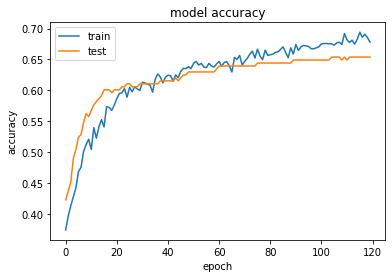

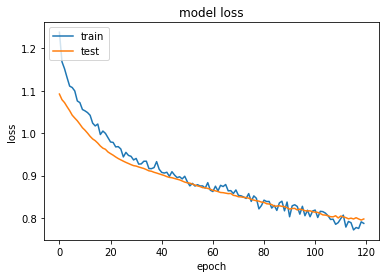

Iteration:9
=== Scores ===
Accuracy: 0.726087
Precision: 0.873198
Recall: 0.513495
F1 score: 0.527613
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.08      0.15        38
    Religion       0.92      0.46      0.62        52
      Racism       0.70      1.00      0.82       140

    accuracy                           0.73       230
   macro avg       0.87      0.51      0.53       230
weighted avg       0.80      0.73      0.66       230

=== Confusion Matrix ===
[[  3   2  33]
 [  0  24  28]
 [  0   0 140]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_94 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_114 (Dropout)        (None, 8, 4)              

1869/1869 [==============================] - 0s 141us/step - loss: 0.9303 - accuracy: 0.6185 - val_loss: 0.9094 - val_accuracy: 0.5962
Epoch 43/120
1869/1869 [==============================] - 0s 141us/step - loss: 0.9226 - accuracy: 0.6239 - val_loss: 0.9073 - val_accuracy: 0.5962
Epoch 44/120
1869/1869 [==============================] - 0s 143us/step - loss: 0.9164 - accuracy: 0.6148 - val_loss: 0.9061 - val_accuracy: 0.5962
Epoch 45/120
1869/1869 [==============================] - 0s 144us/step - loss: 0.9063 - accuracy: 0.6281 - val_loss: 0.9041 - val_accuracy: 0.5962
Epoch 46/120
1869/1869 [==============================] - 0s 142us/step - loss: 0.9062 - accuracy: 0.6249 - val_loss: 0.9014 - val_accuracy: 0.5962
Epoch 47/120
1869/1869 [==============================] - 0s 142us/step - loss: 0.8987 - accuracy: 0.6319 - val_loss: 0.8990 - val_accuracy: 0.5962
Epoch 48/120
1869/1869 [==============================] - 0s 143us/step - loss: 0.9125 - accuracy: 0.6271 - val_loss: 0.8964 

1869/1869 [==============================] - 0s 148us/step - loss: 0.8059 - accuracy: 0.6779 - val_loss: 0.8115 - val_accuracy: 0.6538
Epoch 98/120
1869/1869 [==============================] - 0s 146us/step - loss: 0.8075 - accuracy: 0.6758 - val_loss: 0.8091 - val_accuracy: 0.6538
Epoch 99/120
1869/1869 [==============================] - 0s 145us/step - loss: 0.8207 - accuracy: 0.6736 - val_loss: 0.8074 - val_accuracy: 0.6538
Epoch 100/120
1869/1869 [==============================] - 0s 147us/step - loss: 0.8129 - accuracy: 0.6816 - val_loss: 0.8075 - val_accuracy: 0.6538
Epoch 101/120
1869/1869 [==============================] - 0s 146us/step - loss: 0.7942 - accuracy: 0.6838 - val_loss: 0.8070 - val_accuracy: 0.6538
Epoch 102/120
1869/1869 [==============================] - 0s 146us/step - loss: 0.8031 - accuracy: 0.6790 - val_loss: 0.8036 - val_accuracy: 0.6587
Epoch 103/120
1869/1869 [==============================] - 0s 147us/step - loss: 0.7981 - accuracy: 0.6870 - val_loss: 0.8

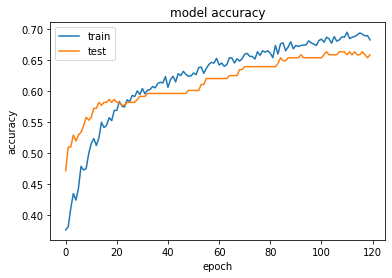

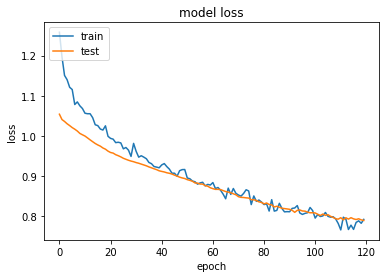

Iteration:10
=== Scores ===
Accuracy: 0.713043
Precision: 0.527706
Recall: 0.495238
F1 score: 0.483786
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.00      0.00      0.00        38
    Religion       0.90      0.50      0.64        52
      Racism       0.69      0.99      0.81       140

    accuracy                           0.71       230
   macro avg       0.53      0.50      0.48       230
weighted avg       0.62      0.71      0.64       230

=== Confusion Matrix ===
[[  0   1  37]
 [  0  26  26]
 [  0   2 138]]




Averages
Accuracy: 0.7082853378505553
Precision: 0.7110175942089408
Recall: 0.49981490962058645
F1 measure: 0.49364296867169266
Confusion Matrix

[[  1.2   2.2  35.3]
 [  0.   25.8  27. ]
 [  0.    2.8 136.4]]


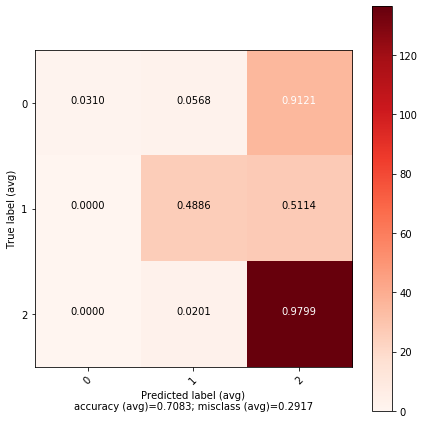

In [120]:
reset_seeds()
cnn_mp = CNN1D_MaxPooling(xTrain, yTrain, target_names, class_names, 'CNN1D (Glove) ',  _epochs = 120, _verbose=2, graph = True, _optimizer = RMSprop(lr=0.0001))

In [123]:
from keras_self_attention import SeqSelfAttention
def CNN1D_ATTENTION(X, y, _target_names = [], _class_names = [], algoname= ' ', _loss='categorical_crossentropy', _optimizer = Adam(lr=0.0001), _metrics=['accuracy'], _epochs = 25 , _validation_split = 0.1, _batch_size = 2, _verbose = 2, graph = False, _kernel_regularizer=l2(0.0001), _bias_regularizer=l2(0.0001)):
    print("--------------- CNN1D ---------------")  

    n_classes = 3
    
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    
    
    count = 1
    for i, (train_index, test_index) in enumerate(kfold.split(X, y.argmax(axis=1))):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        if X_train.ndim == 2:
            xTrain,xTest,_input_shape = Shape_Reshaper(X_train, X_test)
        else:
            xTrain,xTest,_input_shape = Shape_Reshaper_Vec(X_train, X_test)
        
        
            
        model = Sequential()

        model.add(Conv1D(4, kernel_size=3, strides= 3, padding='same',activation='elu', input_shape=_input_shape,kernel_regularizer= _kernel_regularizer, bias_regularizer= _bias_regularizer))
        model.add(Dropout(0.5))
        
        
        model.add(SeqSelfAttention(attention_activation='sigmoid'))
        
        
        model.add(Dense(8 ,activation='elu'))
        model.add(Dropout(0.5))

        
        
        
        model.add(Flatten()) 
        model.add(Dense(n_classes ,activation='softmax'))
        model.summary()


        model.compile(loss=_loss, optimizer=_optimizer, metrics=_metrics)
        
        checkpoint_filepath = 'checkpoint.txt'
        callbacks = [ EarlyStoppingByLossVal(monitor='val_loss', value=.8, verbose=1),
                      ModelCheckpoint(filepath = checkpoint_filepath, monitor='val_loss', save_best_only=True, verbose=0)
                     ]
        
        
        
        history = model.fit(xTrain.astype('float32'), y_train, epochs=_epochs,validation_split = _validation_split,callbacks=callbacks)
        
        # save model and architecture to single file
        model.save("model.h5")
        print("Saved model to disk")
        

        score = model.evaluate(xTest, y_test, verbose=1)
        print("Test Score:", score[0])
        print("Test Accuracy:", score[1])

        accuracy = model.evaluate(xTest, y_test,  verbose=_verbose)
        
        y_pred = model.predict_classes(xTest)
        
        
        if graph:
            Generate_Graph(history)
            
    
        
        
        
        print("Iteration:" + str(count))
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test.argmax(axis=1), y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test.argmax(axis=1), y_pred, average='macro' )
        print('Precision: %f' % precision)
        recall = recall_score(y_test.argmax(axis=1), y_pred, average='macro')
        print('Recall: %f' % recall)
        f1 = f1_score(y_test.argmax(axis=1), y_pred, average='macro')
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        

        print("=== Classification Report ===")
        target_names = _target_names
        print(classification_report(y_test.argmax(axis=1), y_pred, target_names=target_names))
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test.argmax(axis=1), y_pred))
        cfmean.append(confusion_matrix(y_test.argmax(axis=1), y_pred))
  
        print('\n')
        count = count + 1
        
        
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = _class_names
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    return model, kfold        
        

RANDOM SEEDS RESET
--------------- CNN1D ---------------
(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_96 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_119 (Dropout)        (None, 8, 4)              0         
_________________________________________________________________
seq_self_attention_2 (SeqSel (None, 8, 4)              321       
_________________________________________________________________
dense_178 (Dense)            (None, 8, 8)              40        
_________________________________________________________________
dropout_120 (Dropout)        (None, 8, 8)              0         
_________________________________________________________________
flatten_95 (Flatten)         (None, 64)                0

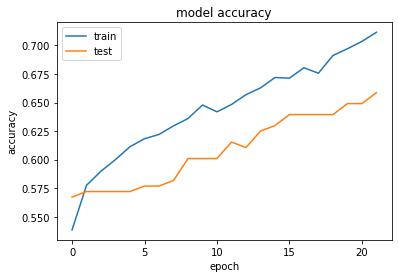

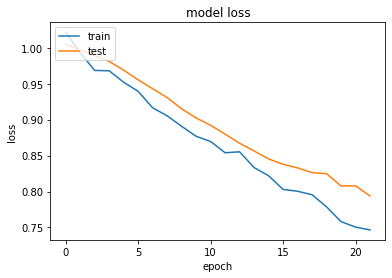

Iteration:1
=== Scores ===
Accuracy: 0.709957
Precision: 0.824026
Recall: 0.514538
F1 score: 0.511334
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.05      0.10        39
    Religion       0.78      0.53      0.63        53
      Racism       0.69      0.96      0.81       139

    accuracy                           0.71       231
   macro avg       0.82      0.51      0.51       231
weighted avg       0.77      0.71      0.65       231

=== Confusion Matrix ===
[[  2   3  34]
 [  0  28  25]
 [  0   5 134]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_97 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_121 (Dropout)        (None, 8, 4)              

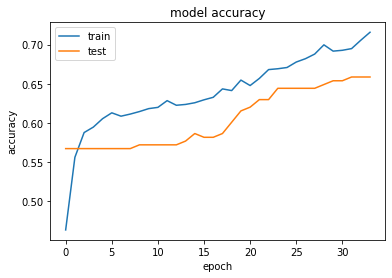

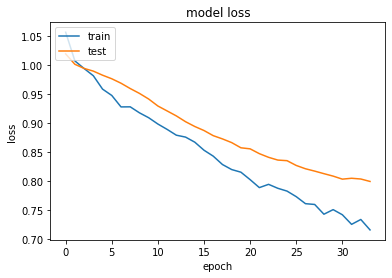

Iteration:2
=== Scores ===
Accuracy: 0.692641
Precision: 0.770175
Recall: 0.491638
F1 score: 0.487647
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.08      0.14        39
    Religion       0.61      0.43      0.51        53
      Racism       0.71      0.96      0.81       139

    accuracy                           0.69       231
   macro avg       0.77      0.49      0.49       231
weighted avg       0.73      0.69      0.63       231

=== Confusion Matrix ===
[[  3  10  26]
 [  0  23  30]
 [  0   5 134]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_98"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_98 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_123 (Dropout)        (None, 8, 4)              

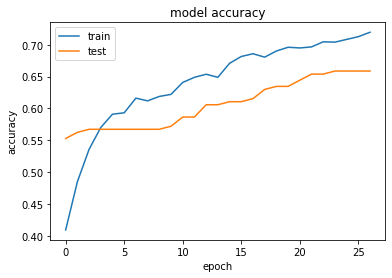

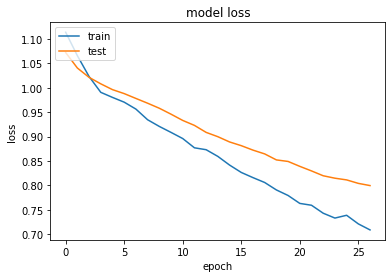

Iteration:3
=== Scores ===
Accuracy: 0.735931
Precision: 0.847345
Recall: 0.552273
F1 score: 0.546846
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.05      0.10        39
    Religion       0.83      0.64      0.72        53
      Racism       0.71      0.96      0.82       139

    accuracy                           0.74       231
   macro avg       0.85      0.55      0.55       231
weighted avg       0.79      0.74      0.68       231

=== Confusion Matrix ===
[[  2   2  35]
 [  0  34  19]
 [  0   5 134]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_99 (Conv1D)           (None, 8, 4)              3604      
_________________________________________________________________
dropout_125 (Dropout)        (None, 8, 4)              

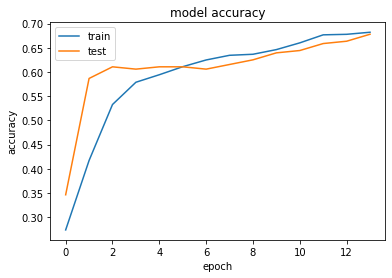

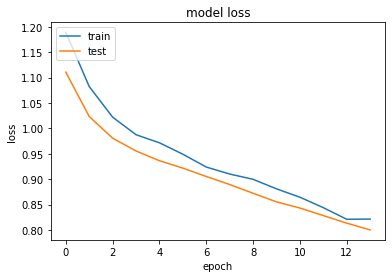

Iteration:4
=== Scores ===
Accuracy: 0.670996
Precision: 0.643110
Recall: 0.455676
F1 score: 0.446245
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.50      0.03      0.05        39
    Religion       0.77      0.38      0.51        53
      Racism       0.66      0.96      0.78       139

    accuracy                           0.67       231
   macro avg       0.64      0.46      0.45       231
weighted avg       0.66      0.67      0.60       231

=== Confusion Matrix ===
[[  1   1  37]
 [  1  20  32]
 [  0   5 134]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_100 (Conv1D)          (None, 8, 4)              3604      
_________________________________________________________________
dropout_127 (Dropout)        (None, 8, 4)             

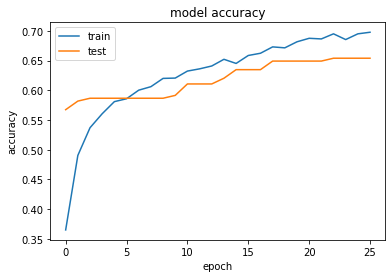

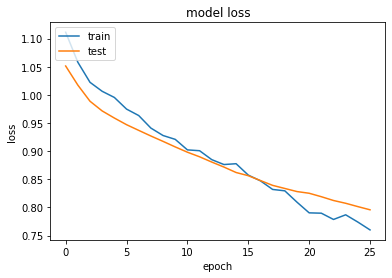

Iteration:5
=== Scores ===
Accuracy: 0.709957
Precision: 0.839195
Recall: 0.498973
F1 score: 0.499029
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.05      0.10        39
    Religion       0.83      0.45      0.59        53
      Racism       0.69      0.99      0.81       139

    accuracy                           0.71       231
   macro avg       0.84      0.50      0.50       231
weighted avg       0.77      0.71      0.64       231

=== Confusion Matrix ===
[[  2   4  33]
 [  0  24  29]
 [  0   1 138]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_101 (Conv1D)          (None, 8, 4)              3604      
_________________________________________________________________
dropout_129 (Dropout)        (None, 8, 4)             

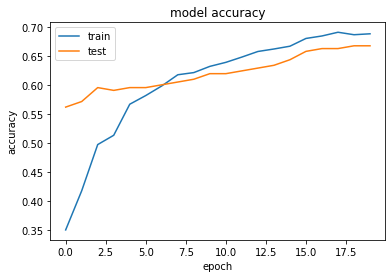

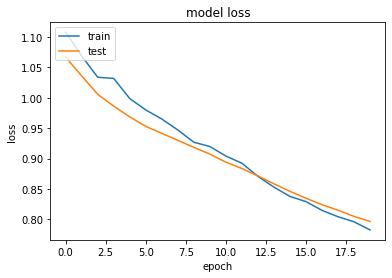

Iteration:6
=== Scores ===
Accuracy: 0.696970
Precision: 0.826131
Recall: 0.491778
F1 score: 0.491564
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.05      0.10        39
    Religion       0.80      0.45      0.58        53
      Racism       0.68      0.97      0.80       139

    accuracy                           0.70       231
   macro avg       0.83      0.49      0.49       231
weighted avg       0.76      0.70      0.63       231

=== Confusion Matrix ===
[[  2   2  35]
 [  0  24  29]
 [  0   4 135]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_102"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_102 (Conv1D)          (None, 8, 4)              3604      
_________________________________________________________________
dropout_131 (Dropout)        (None, 8, 4)             

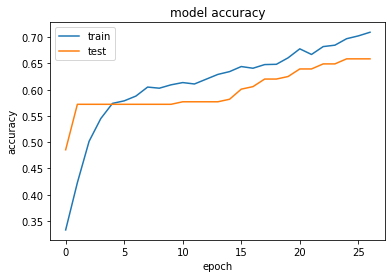

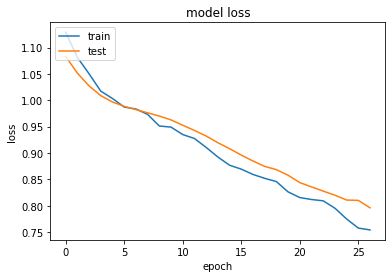

Iteration:7
=== Scores ===
Accuracy: 0.692641
Precision: 0.836106
Recall: 0.490005
F1 score: 0.505432
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.10      0.19        39
    Religion       0.84      0.40      0.54        53
      Racism       0.67      0.97      0.79       139

    accuracy                           0.69       231
   macro avg       0.84      0.49      0.51       231
weighted avg       0.76      0.69      0.63       231

=== Confusion Matrix ===
[[  4   0  35]
 [  0  21  32]
 [  0   4 135]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_103 (Conv1D)          (None, 8, 4)              3604      
_________________________________________________________________
dropout_133 (Dropout)        (None, 8, 4)             

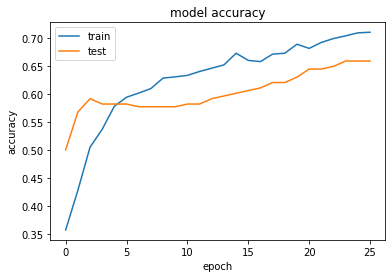

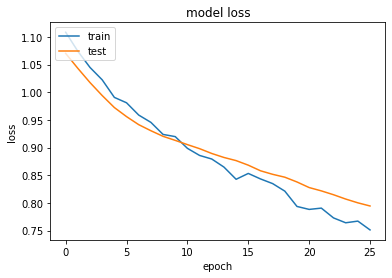

Iteration:8
=== Scores ===
Accuracy: 0.704348
Precision: 0.854278
Recall: 0.490735
F1 score: 0.495266
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.05      0.10        38
    Religion       0.88      0.43      0.58        53
      Racism       0.68      0.99      0.80       139

    accuracy                           0.70       230
   macro avg       0.85      0.49      0.50       230
weighted avg       0.78      0.70      0.64       230

=== Confusion Matrix ===
[[  2   1  35]
 [  0  23  30]
 [  0   2 137]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_104 (Conv1D)          (None, 8, 4)              3604      
_________________________________________________________________
dropout_135 (Dropout)        (None, 8, 4)             

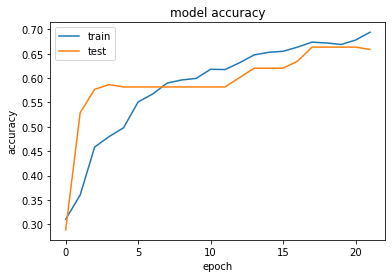

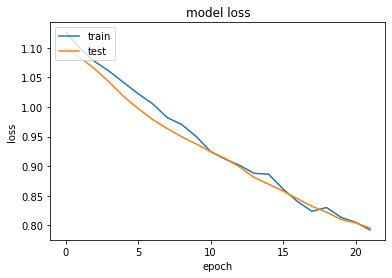

Iteration:9
=== Scores ===
Accuracy: 0.708696
Precision: 0.837143
Recall: 0.493551
F1 score: 0.495588
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.05      0.10        38
    Religion       0.82      0.44      0.57        52
      Racism       0.69      0.99      0.81       140

    accuracy                           0.71       230
   macro avg       0.84      0.49      0.50       230
weighted avg       0.77      0.71      0.64       230

=== Confusion Matrix ===
[[  2   3  33]
 [  0  23  29]
 [  0   2 138]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_105"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_105 (Conv1D)          (None, 8, 4)              3604      
_________________________________________________________________
dropout_137 (Dropout)        (None, 8, 4)             

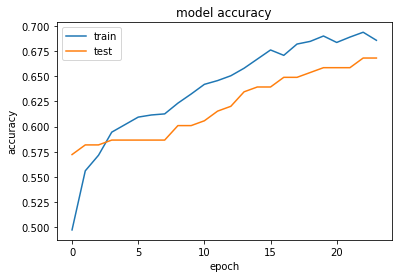

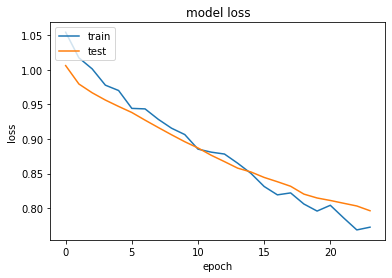

Iteration:10
=== Scores ===
Accuracy: 0.721739
Precision: 0.882706
Recall: 0.511114
F1 score: 0.527528
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.08      0.15        38
    Religion       0.96      0.46      0.62        52
      Racism       0.69      0.99      0.81       140

    accuracy                           0.72       230
   macro avg       0.88      0.51      0.53       230
weighted avg       0.80      0.72      0.66       230

=== Confusion Matrix ===
[[  3   0  35]
 [  0  24  28]
 [  0   1 139]]




Averages
Accuracy: 0.7043873517786561
Precision: 0.8160214580438666
Recall: 0.49902813561104803
F1 measure: 0.5006478924744054
Confusion Matrix

[[2.300e+00 2.600e+00 3.380e+01]
 [1.000e-01 2.440e+01 2.830e+01]
 [0.000e+00 3.400e+00 1.358e+02]]


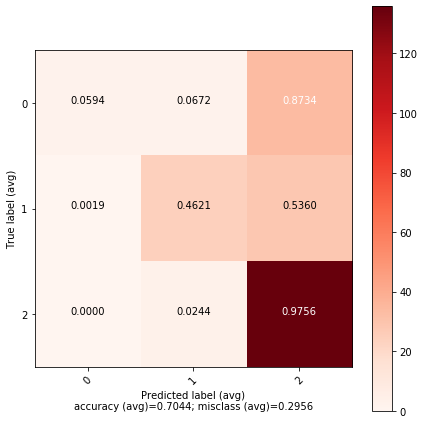

In [124]:
reset_seeds()
cnn_att = CNN1D_ATTENTION(xTrain, yTrain, target_names, class_names, 'CNN1D (Glove) ',  _epochs = 100, _verbose=2, graph = True, _optimizer = RMSprop(lr=0.0001))

In [128]:
from keras.layers import LSTM, Dense
import numpy as np
def LSTM_Model(X, y, _target_names = [], _class_names = [], algoname= ' ', _loss='categorical_crossentropy', _optimizer = Adam(lr=0.0001), _metrics=['accuracy'], _epochs = 25 , _validation_split = 0.1, _batch_size = 2, _verbose = 2, graph = False, _kernel_regularizer=l2(0.01), _bias_regularizer=l2(0.0001)):
    print("--------------- CNN1D ---------------")  

    n_classes = 3
    
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    
    
    count = 1
    for i, (train_index, test_index) in enumerate(kfold.split(X, y.argmax(axis=1))):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        if X_train.ndim == 2:
            xTrain,xTest,_input_shape = Shape_Reshaper(X_train, X_test)
        else:
            xTrain,xTest,_input_shape = Shape_Reshaper_Vec(X_train, X_test)
        
        
            
        model = Sequential() 
        model.add (LSTM(4, return_sequences=True, activation="elu", input_shape=_input_shape))
        model.add(Dropout(0.5))
        
        model.add(Dense(8 ,activation='elu'))
        model.add(Dropout(0.5))

        
        model.add(Flatten()) 
        model.add(Dense(n_classes ,activation='softmax'))
        model.summary()


        model.compile(loss=_loss, optimizer=_optimizer, metrics=_metrics)
        
        checkpoint_filepath = 'checkpoint.txt'
        callbacks = [ EarlyStoppingByLossVal(monitor='val_loss', value=.85, verbose=1),
                      ModelCheckpoint(filepath = checkpoint_filepath, monitor='val_loss', save_best_only=True, verbose=0)
                     ]
        
        
        
        history = model.fit(xTrain.astype('float32'), y_train, epochs=_epochs,validation_split = _validation_split,callbacks=callbacks)
        
        # save model and architecture to single file
        model.save("model.h5")
        print("Saved model to disk")
        

        score = model.evaluate(xTest, y_test, verbose=1)
        print("Test Score:", score[0])
        print("Test Accuracy:", score[1])

        accuracy = model.evaluate(xTest, y_test,  verbose=_verbose)
        
        y_pred = model.predict_classes(xTest)
        
        
        if graph:
            Generate_Graph(history)
            
    
        
        
        
        print("Iteration:" + str(count))
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test.argmax(axis=1), y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test.argmax(axis=1), y_pred, average='macro' )
        print('Precision: %f' % precision)
        recall = recall_score(y_test.argmax(axis=1), y_pred, average='macro')
        print('Recall: %f' % recall)
        f1 = f1_score(y_test.argmax(axis=1), y_pred, average='macro')
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        

        print("=== Classification Report ===")
        target_names = _target_names
        print(classification_report(y_test.argmax(axis=1), y_pred, target_names=target_names))
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test.argmax(axis=1), y_pred))
        cfmean.append(confusion_matrix(y_test.argmax(axis=1), y_pred))
  
        print('\n')
        count = count + 1
        
        
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = _class_names
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    return model, kfold        
        

RANDOM SEEDS RESET
--------------- CNN1D ---------------
(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_108"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 24, 4)             4880      
_________________________________________________________________
dropout_143 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________
dense_202 (Dense)            (None, 24, 8)             40        
_________________________________________________________________
dropout_144 (Dropout)        (None, 24, 8)             0         
_________________________________________________________________
flatten_107 (Flatten)        (None, 192)               0         
_________________________________________________________________
dense_203 (Dense)            (None, 3)                 

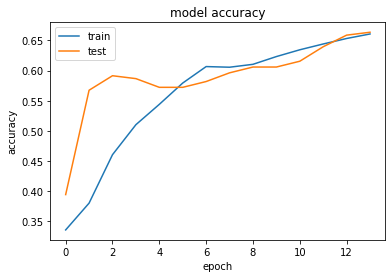

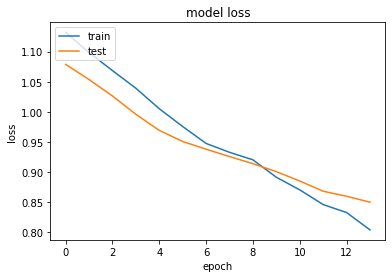

Iteration:1
=== Scores ===
Accuracy: 0.670996
Precision: 0.642846
Recall: 0.440111
F1 score: 0.431111
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.33      0.03      0.05        39
    Religion       0.94      0.30      0.46        53
      Racism       0.65      0.99      0.79       139

    accuracy                           0.67       231
   macro avg       0.64      0.44      0.43       231
weighted avg       0.67      0.67      0.59       231

=== Confusion Matrix ===
[[  1   0  38]
 [  2  16  35]
 [  0   1 138]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_109"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 24, 4)             4880      
_________________________________________________________________
dropout_145 (Dropout)        (None, 24, 4)            

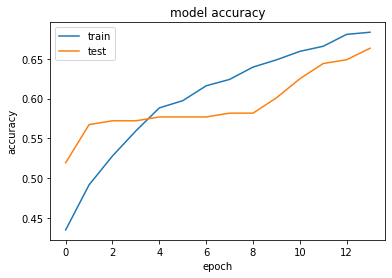

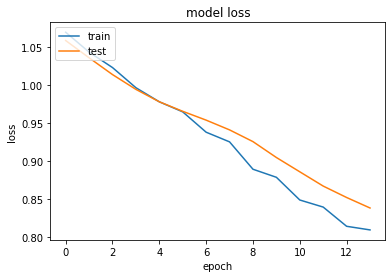

Iteration:2
=== Scores ===
Accuracy: 0.705628
Precision: 0.524923
Recall: 0.492059
F1 score: 0.479222
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.00      0.00      0.00        39
    Religion       0.90      0.49      0.63        53
      Racism       0.68      0.99      0.80       139

    accuracy                           0.71       231
   macro avg       0.52      0.49      0.48       231
weighted avg       0.61      0.71      0.63       231

=== Confusion Matrix ===
[[  0   1  38]
 [  0  26  27]
 [  0   2 137]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_110"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 24, 4)             4880      
_________________________________________________________________
dropout_147 (Dropout)        (None, 24, 4)            

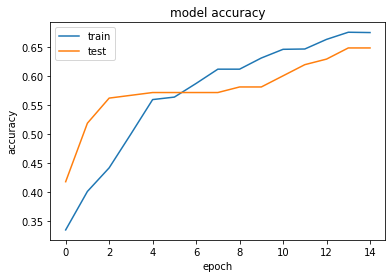

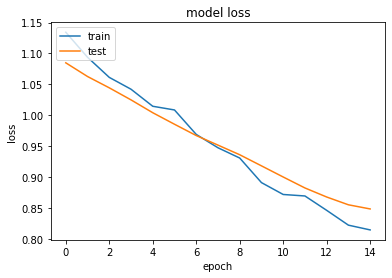

Iteration:3
=== Scores ===
Accuracy: 0.692641
Precision: 0.495289
Recall: 0.484865
F1 score: 0.468221
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.00      0.00      0.00        39
    Religion       0.81      0.49      0.61        53
      Racism       0.67      0.96      0.79       139

    accuracy                           0.69       231
   macro avg       0.50      0.48      0.47       231
weighted avg       0.59      0.69      0.62       231

=== Confusion Matrix ===
[[  0   1  38]
 [  0  26  27]
 [  0   5 134]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_111"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 24, 4)             4880      
_________________________________________________________________
dropout_149 (Dropout)        (None, 24, 4)            

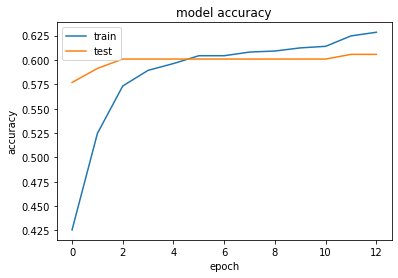

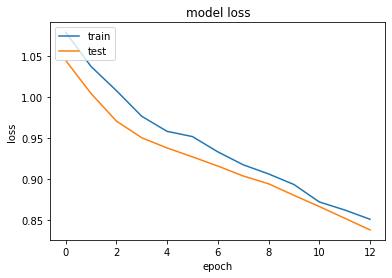

Iteration:4
=== Scores ===
Accuracy: 0.627706
Precision: 0.708709
Recall: 0.377842
F1 score: 0.336853
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.50      0.08      0.13        39
    Religion       1.00      0.06      0.11        53
      Racism       0.63      1.00      0.77       139

    accuracy                           0.63       231
   macro avg       0.71      0.38      0.34       231
weighted avg       0.69      0.63      0.51       231

=== Confusion Matrix ===
[[  3   0  36]
 [  3   3  47]
 [  0   0 139]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_112"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 24, 4)             4880      
_________________________________________________________________
dropout_151 (Dropout)        (None, 24, 4)            

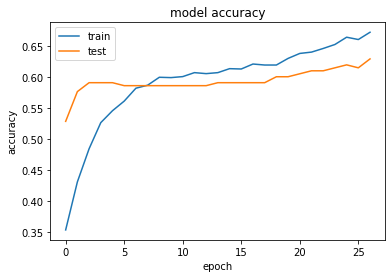

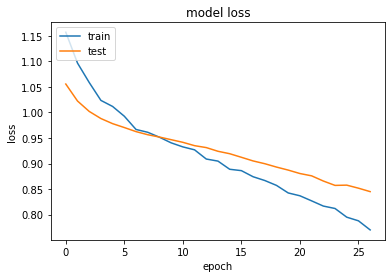

Iteration:5
=== Scores ===
Accuracy: 0.688312
Precision: 0.660200
Recall: 0.479824
F1 score: 0.482325
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.67      0.10      0.18        39
    Religion       0.61      0.36      0.45        53
      Racism       0.70      0.98      0.82       139

    accuracy                           0.69       231
   macro avg       0.66      0.48      0.48       231
weighted avg       0.68      0.69      0.63       231

=== Confusion Matrix ===
[[  4   9  26]
 [  2  19  32]
 [  0   3 136]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_113"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 24, 4)             4880      
_________________________________________________________________
dropout_153 (Dropout)        (None, 24, 4)            

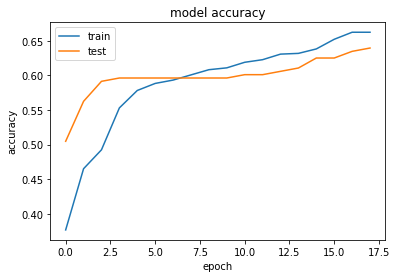

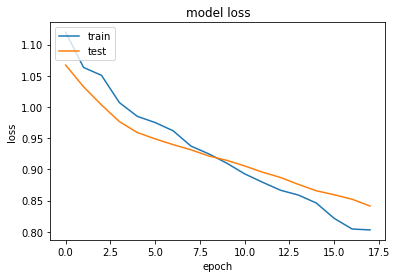

Iteration:6
=== Scores ===
Accuracy: 0.675325
Precision: 0.495974
Recall: 0.448034
F1 score: 0.430636
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.00      0.00      0.00        39
    Religion       0.83      0.36      0.50        53
      Racism       0.66      0.99      0.79       139

    accuracy                           0.68       231
   macro avg       0.50      0.45      0.43       231
weighted avg       0.59      0.68      0.59       231

=== Confusion Matrix ===
[[  0   2  37]
 [  1  19  33]
 [  0   2 137]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_114"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 24, 4)             4880      
_________________________________________________________________
dropout_155 (Dropout)        (None, 24, 4)            

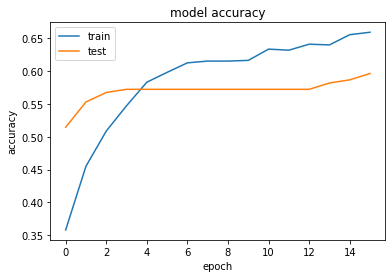

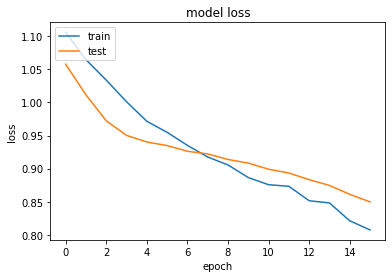

Iteration:7
=== Scores ===
Accuracy: 0.670996
Precision: 0.818501
Recall: 0.446260
F1 score: 0.441091
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.05      0.10        39
    Religion       0.80      0.30      0.44        53
      Racism       0.66      0.99      0.79       139

    accuracy                           0.67       231
   macro avg       0.82      0.45      0.44       231
weighted avg       0.75      0.67      0.59       231

=== Confusion Matrix ===
[[  2   2  35]
 [  0  16  37]
 [  0   2 137]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_115"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_157 (Dropout)        (None, 24, 4)            

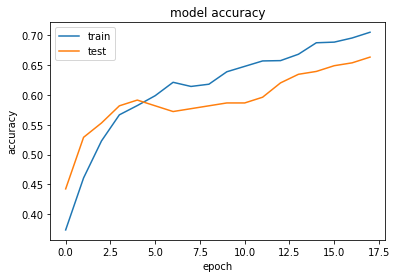

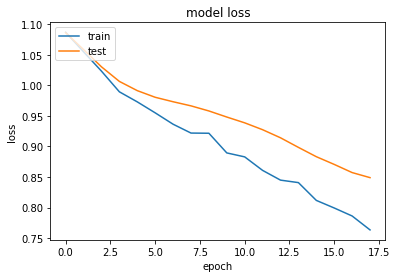

Iteration:8
=== Scores ===
Accuracy: 0.713043
Precision: 0.833961
Recall: 0.503314
F1 score: 0.503571
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.05      0.10        38
    Religion       0.81      0.47      0.60        53
      Racism       0.70      0.99      0.82       139

    accuracy                           0.71       230
   macro avg       0.83      0.50      0.50       230
weighted avg       0.77      0.71      0.65       230

=== Confusion Matrix ===
[[  2   4  32]
 [  0  25  28]
 [  0   2 137]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_116"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_159 (Dropout)        (None, 24, 4)            

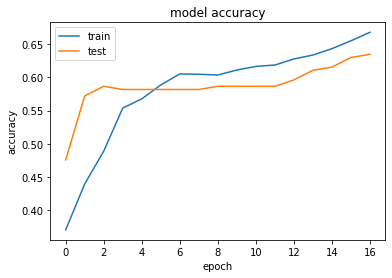

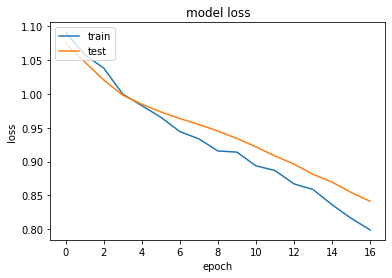

Iteration:9
=== Scores ===
Accuracy: 0.700000
Precision: 0.858776
Recall: 0.475034
F1 score: 0.484419
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.08      0.15        38
    Religion       0.90      0.35      0.50        52
      Racism       0.68      1.00      0.81       140

    accuracy                           0.70       230
   macro avg       0.86      0.48      0.48       230
weighted avg       0.78      0.70      0.63       230

=== Confusion Matrix ===
[[  3   2  33]
 [  0  18  34]
 [  0   0 140]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_117"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_161 (Dropout)        (None, 24, 4)            

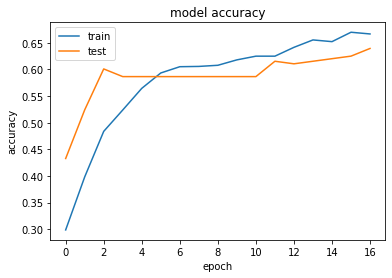

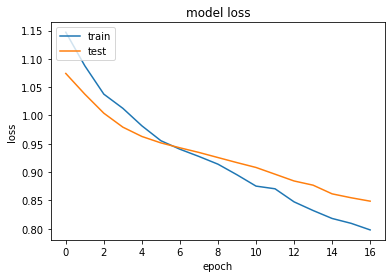

Iteration:10
=== Scores ===
Accuracy: 0.713043
Precision: 0.701760
Recall: 0.499961
F1 score: 0.496205
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.67      0.05      0.10        38
    Religion       0.73      0.46      0.56        52
      Racism       0.71      0.99      0.83       140

    accuracy                           0.71       230
   macro avg       0.70      0.50      0.50       230
weighted avg       0.71      0.71      0.65       230

=== Confusion Matrix ===
[[  2   7  29]
 [  1  24  27]
 [  0   2 138]]




Averages
Accuracy: 0.6857688688123471
Precision: 0.6740939283883052
Recall: 0.464730463236818
F1 measure: 0.45536550019228617
Confusion Matrix

[[  1.7   2.8  34.2]
 [  0.9  19.2  32.7]
 [  0.    1.9 137.3]]


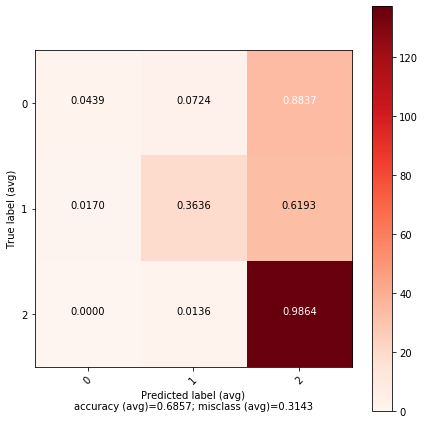

In [129]:
reset_seeds()
lstm = LSTM_Model(xTrain, yTrain, target_names, class_names, 'LSTM (Glove) ',  _epochs = 35, _verbose=2, graph = True, _optimizer = RMSprop(lr=0.0001))

In [130]:
from keras.layers import LSTM, Dense
import numpy as np
def LSTM_Model_MaxPooling(X, y, _target_names = [], _class_names = [], algoname= ' ', _loss='categorical_crossentropy', _optimizer = Adam(lr=0.0001), _metrics=['accuracy'], _epochs = 25 , _validation_split = 0.1, _batch_size = 2, _verbose = 2, graph = False, _kernel_regularizer=l2(0.01), _bias_regularizer=l2(0.0001)):
    print("--------------- CNN1D ---------------")  

    n_classes = 3
    
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    
    
    count = 1
    for i, (train_index, test_index) in enumerate(kfold.split(X, y.argmax(axis=1))):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        if X_train.ndim == 2:
            xTrain,xTest,_input_shape = Shape_Reshaper(X_train, X_test)
        else:
            xTrain,xTest,_input_shape = Shape_Reshaper_Vec(X_train, X_test)
        
        
            
        model = Sequential() 
        model.add (LSTM(4, return_sequences=True, activation="elu", input_shape=_input_shape))
        model.add(Dropout(0.5))
        
        model.add(MaxPooling1D(pool_size=1, strides=1, padding='valid', data_format='channels_last'))
        model.add(Dropout(0.5))
        
        model.add(Dense(16 ,activation='elu'))
        model.add(Dropout(0.5))

        
        model.add(Flatten()) 
        model.add(Dense(n_classes ,activation='softmax'))
        model.summary()


        model.compile(loss=_loss, optimizer=_optimizer, metrics=_metrics)
        
        checkpoint_filepath = 'checkpoint.txt'
        callbacks = [ EarlyStoppingByLossVal(monitor='val_loss', value=.85, verbose=1),
                      ModelCheckpoint(filepath = checkpoint_filepath, monitor='val_loss', save_best_only=True, verbose=0)
                     ]
        
        
        
        history = model.fit(xTrain.astype('float32'), y_train, epochs=_epochs,validation_split = _validation_split,callbacks=callbacks)
        
        # save model and architecture to single file
        model.save("model.h5")
        print("Saved model to disk")
        

        score = model.evaluate(xTest, y_test, verbose=1)
        print("Test Score:", score[0])
        print("Test Accuracy:", score[1])

        accuracy = model.evaluate(xTest, y_test,  verbose=_verbose)
        
        y_pred = model.predict_classes(xTest)
        
        
        if graph:
            Generate_Graph(history)
            
    
        
        
        
        print("Iteration:" + str(count))
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test.argmax(axis=1), y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test.argmax(axis=1), y_pred, average='macro' )
        print('Precision: %f' % precision)
        recall = recall_score(y_test.argmax(axis=1), y_pred, average='macro')
        print('Recall: %f' % recall)
        f1 = f1_score(y_test.argmax(axis=1), y_pred, average='macro')
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        

        print("=== Classification Report ===")
        target_names = _target_names
        print(classification_report(y_test.argmax(axis=1), y_pred, target_names=target_names))
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test.argmax(axis=1), y_pred))
        cfmean.append(confusion_matrix(y_test.argmax(axis=1), y_pred))
  
        print('\n')
        count = count + 1
        
        
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = _class_names
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    return model, kfold        
        

RANDOM SEEDS RESET
--------------- CNN1D ---------------
(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_118"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_163 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 24, 4)             0         
_________________________________________________________________
dropout_164 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________
dense_222 (Dense)            (None, 24, 16)            80        
_________________________________________________________________
dropout_165 (Dropout)        (None, 24, 16)            

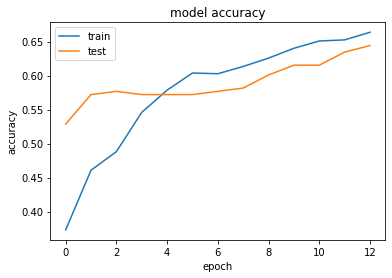

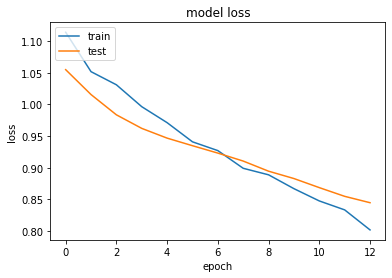

Iteration:1
=== Scores ===
Accuracy: 0.679654
Precision: 0.464919
Recall: 0.446541
F1 score: 0.422445
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.00      0.00      0.00        39
    Religion       0.72      0.34      0.46        53
      Racism       0.67      1.00      0.81       139

    accuracy                           0.68       231
   macro avg       0.46      0.45      0.42       231
weighted avg       0.57      0.68      0.59       231

=== Confusion Matrix ===
[[  0   7  32]
 [  0  18  35]
 [  0   0 139]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_119"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_166 (Dropout)        (None, 24, 4)            

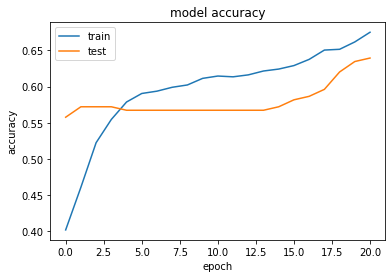

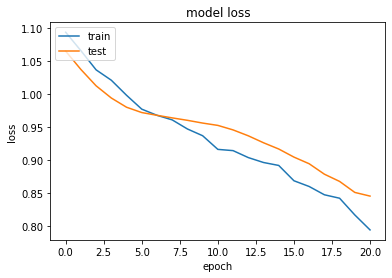

Iteration:2
=== Scores ===
Accuracy: 0.701299
Precision: 0.849205
Recall: 0.484761
F1 score: 0.492437
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.08      0.14        39
    Religion       0.87      0.38      0.53        53
      Racism       0.68      1.00      0.81       139

    accuracy                           0.70       231
   macro avg       0.85      0.48      0.49       231
weighted avg       0.78      0.70      0.63       231

=== Confusion Matrix ===
[[  3   3  33]
 [  0  20  33]
 [  0   0 139]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_120"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_169 (Dropout)        (None, 24, 4)            

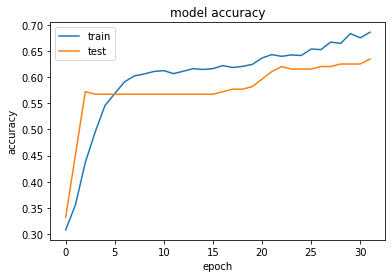

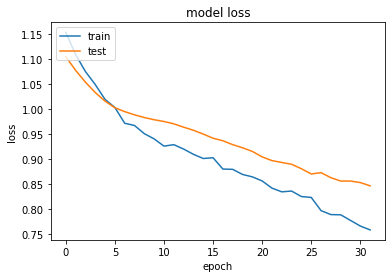

Iteration:3
=== Scores ===
Accuracy: 0.701299
Precision: 0.713908
Recall: 0.501959
F1 score: 0.500761
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.67      0.05      0.10        39
    Religion       0.79      0.49      0.60        53
      Racism       0.69      0.96      0.80       139

    accuracy                           0.70       231
   macro avg       0.71      0.50      0.50       231
weighted avg       0.71      0.70      0.64       231

=== Confusion Matrix ===
[[  2   2  35]
 [  1  26  26]
 [  0   5 134]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_121"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_172 (Dropout)        (None, 24, 4)            

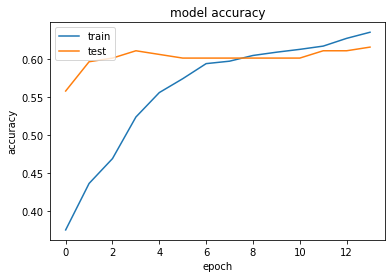

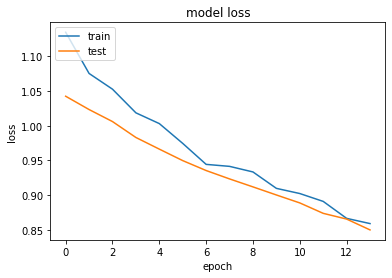

Iteration:4
=== Scores ===
Accuracy: 0.640693
Precision: 0.839283
Recall: 0.392195
F1 score: 0.360096
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.03      0.05        39
    Religion       0.89      0.15      0.26        53
      Racism       0.63      1.00      0.77       139

    accuracy                           0.64       231
   macro avg       0.84      0.39      0.36       231
weighted avg       0.75      0.64      0.53       231

=== Confusion Matrix ===
[[  1   1  37]
 [  0   8  45]
 [  0   0 139]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_122"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_175 (Dropout)        (None, 24, 4)            

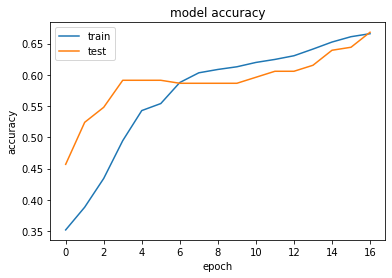

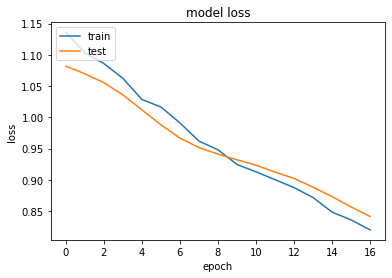

Iteration:5
=== Scores ===
Accuracy: 0.683983
Precision: 0.841824
Recall: 0.465128
F1 score: 0.465378
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.05      0.10        39
    Religion       0.86      0.36      0.51        53
      Racism       0.66      0.99      0.79       139

    accuracy                           0.68       231
   macro avg       0.84      0.47      0.47       231
weighted avg       0.77      0.68      0.61       231

=== Confusion Matrix ===
[[  2   1  36]
 [  0  19  34]
 [  0   2 137]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_123"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_178 (Dropout)        (None, 24, 4)            

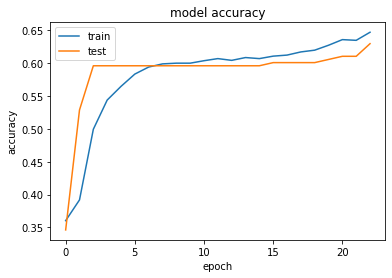

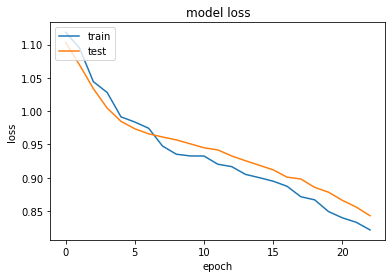

Iteration:6
=== Scores ===
Accuracy: 0.627706
Precision: 0.418614
Recall: 0.386634
F1 score: 0.351576
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.00      0.00      0.00        39
    Religion       0.62      0.19      0.29        53
      Racism       0.63      0.97      0.76       139

    accuracy                           0.63       231
   macro avg       0.42      0.39      0.35       231
weighted avg       0.52      0.63      0.53       231

=== Confusion Matrix ===
[[  0   2  37]
 [  1  10  42]
 [  0   4 135]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_124"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_181 (Dropout)        (None, 24, 4)            

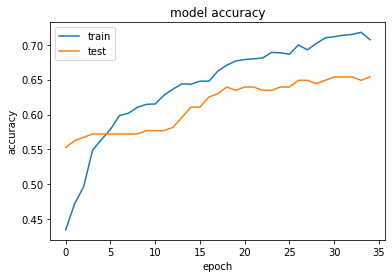

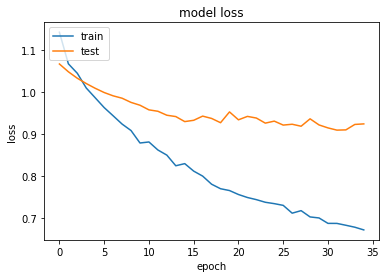

Iteration:7
=== Scores ===
Accuracy: 0.709957
Precision: 0.453595
Recall: 0.517805
F1 score: 0.480990
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.00      0.00      0.00        39
    Religion       0.63      0.60      0.62        53
      Racism       0.73      0.95      0.83       139

    accuracy                           0.71       231
   macro avg       0.45      0.52      0.48       231
weighted avg       0.59      0.71      0.64       231

=== Confusion Matrix ===
[[  0  12  27]
 [  0  32  21]
 [  0   7 132]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_125"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_184 (Dropout)        (None, 24, 4)            

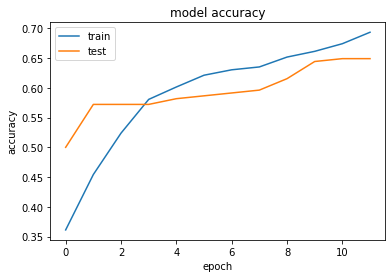

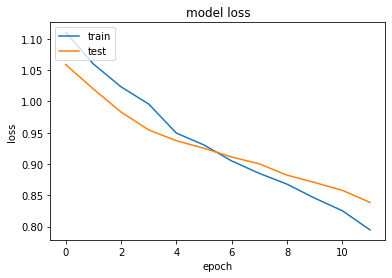

Iteration:8
=== Scores ===
Accuracy: 0.686957
Precision: 0.491057
Recall: 0.456721
F1 score: 0.438382
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.00      0.00      0.00        38
    Religion       0.80      0.38      0.51        53
      Racism       0.67      0.99      0.80       139

    accuracy                           0.69       230
   macro avg       0.49      0.46      0.44       230
weighted avg       0.59      0.69      0.60       230

=== Confusion Matrix ===
[[  0   4  34]
 [  0  20  33]
 [  0   1 138]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_126"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_187 (Dropout)        (None, 24, 4)            

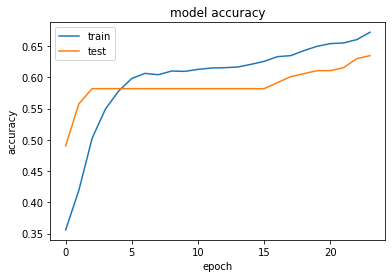

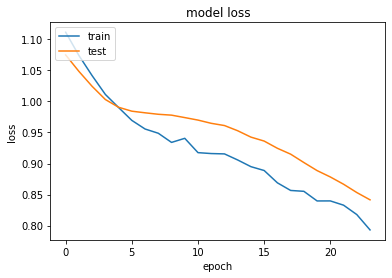

Iteration:9
=== Scores ===
Accuracy: 0.673913
Precision: 0.640668
Recall: 0.444631
F1 score: 0.445606
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.43      0.08      0.13        38
    Religion       0.82      0.27      0.41        52
      Racism       0.67      0.99      0.80       140

    accuracy                           0.67       230
   macro avg       0.64      0.44      0.45       230
weighted avg       0.66      0.67      0.60       230

=== Confusion Matrix ===
[[  3   2  33]
 [  3  14  35]
 [  1   1 138]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_127"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_190 (Dropout)        (None, 24, 4)            

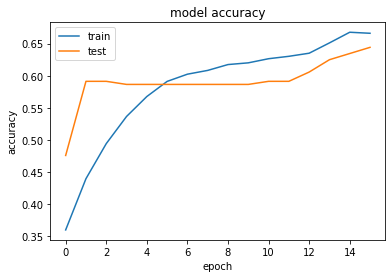

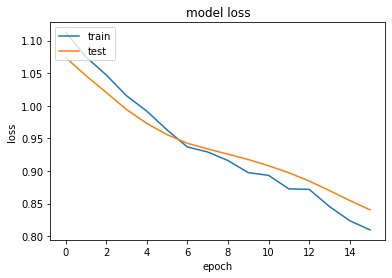

Iteration:10
=== Scores ===
Accuracy: 0.700000
Precision: 0.531057
Recall: 0.476007
F1 score: 0.465801
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.00      0.00      0.00        38
    Religion       0.92      0.44      0.60        52
      Racism       0.67      0.99      0.80       140

    accuracy                           0.70       230
   macro avg       0.53      0.48      0.47       230
weighted avg       0.62      0.70      0.62       230

=== Confusion Matrix ===
[[  0   0  38]
 [  0  23  29]
 [  0   2 138]]




Averages
Accuracy: 0.6805458309806136
Precision: 0.6244129050028673
Recall: 0.4572381470621488
F1 measure: 0.4423473265518199
Confusion Matrix

[[1.100e+00 3.400e+00 3.420e+01]
 [5.000e-01 1.900e+01 3.330e+01]
 [1.000e-01 2.200e+00 1.369e+02]]


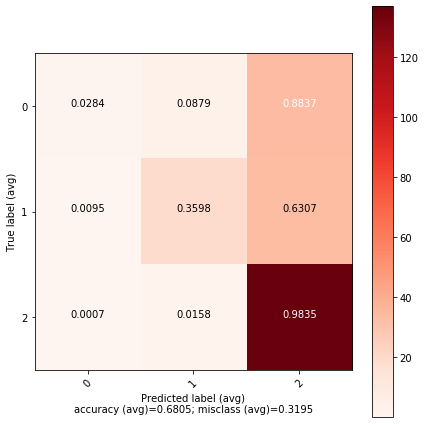

In [131]:
reset_seeds()
lstm_mp = LSTM_Model_MaxPooling(xTrain, yTrain, target_names, class_names, 'LSTM (Glove) ',  _epochs = 35, _verbose=2, graph = True, _optimizer = RMSprop(lr=0.0001))

In [132]:
from keras.layers import LSTM, Dense
import numpy as np
def LSTM_Model_ATTENTION(X, y, _target_names = [], _class_names = [], algoname= ' ', _loss='categorical_crossentropy', _optimizer = Adam(lr=0.0001), _metrics=['accuracy'], _epochs = 25 , _validation_split = 0.1, _batch_size = 2, _verbose = 2, graph = False, _kernel_regularizer=l2(0.01), _bias_regularizer=l2(0.0001)):
    print("--------------- CNN1D ---------------")  

    n_classes = 3
    
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    
    
    count = 1
    for i, (train_index, test_index) in enumerate(kfold.split(X, y.argmax(axis=1))):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        if X_train.ndim == 2:
            xTrain,xTest,_input_shape = Shape_Reshaper(X_train, X_test)
        else:
            xTrain,xTest,_input_shape = Shape_Reshaper_Vec(X_train, X_test)
        
        
            
        model = Sequential() 
        model.add (LSTM(4, return_sequences=True, activation="tanh", input_shape=_input_shape))
        model.add(Dropout(0.2))
        
        model.add(SeqSelfAttention(attention_activation='sigmoid'))
        
        model.add(Dense(16 ,activation='elu'))
        model.add(Dropout(0.2))

        
        model.add(Flatten()) 
        model.add(Dense(n_classes ,activation='softmax'))
        model.summary()


        model.compile(loss=_loss, optimizer=_optimizer, metrics=_metrics)
        
        checkpoint_filepath = 'checkpoint.txt'
        callbacks = [ EarlyStoppingByLossVal(monitor='val_loss', value=.25, verbose=1),
                      ModelCheckpoint(filepath = checkpoint_filepath, monitor='val_loss', save_best_only=True, verbose=0)
                     ]
        
        
        
        history = model.fit(xTrain.astype('float32'), y_train, epochs=_epochs,validation_split = _validation_split,callbacks=callbacks)
        
        # save model and architecture to single file
        model.save("model.h5")
        print("Saved model to disk")
        

        score = model.evaluate(xTest, y_test, verbose=1)
        print("Test Score:", score[0])
        print("Test Accuracy:", score[1])

        accuracy = model.evaluate(xTest, y_test,  verbose=_verbose)
        
        y_pred = model.predict_classes(xTest)
        
        
        if graph:
            Generate_Graph(history)
            
    
        
        
        
        print("Iteration:" + str(count))
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test.argmax(axis=1), y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test.argmax(axis=1), y_pred, average='macro' )
        print('Precision: %f' % precision)
        recall = recall_score(y_test.argmax(axis=1), y_pred, average='macro')
        print('Recall: %f' % recall)
        f1 = f1_score(y_test.argmax(axis=1), y_pred, average='macro')
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        

        print("=== Classification Report ===")
        target_names = _target_names
        print(classification_report(y_test.argmax(axis=1), y_pred, target_names=target_names))
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test.argmax(axis=1), y_pred))
        cfmean.append(confusion_matrix(y_test.argmax(axis=1), y_pred))
  
        print('\n')
        count = count + 1
        
        
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = _class_names
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    return model, kfold        
        

RANDOM SEEDS RESET
--------------- CNN1D ---------------
(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_193 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________
seq_self_attention_12 (SeqSe (None, 24, 4)             321       
_________________________________________________________________
dense_242 (Dense)            (None, 24, 16)            80        
_________________________________________________________________
dropout_194 (Dropout)        (None, 24, 16)            0         
_________________________________________________________________
flatten_127 (Flatten)        (None, 384)               

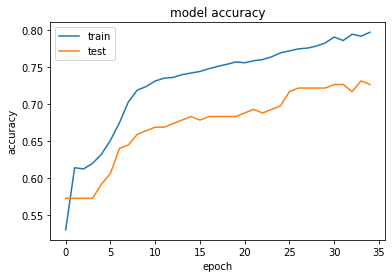

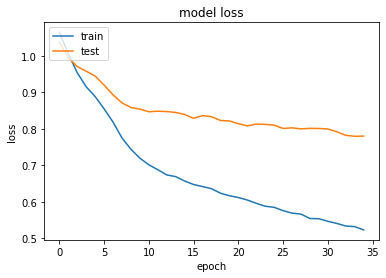

Iteration:1
=== Scores ===
Accuracy: 0.735931
Precision: 0.665739
Recall: 0.603098
F1 score: 0.617571
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.47      0.23      0.31        39
    Religion       0.77      0.68      0.72        53
      Racism       0.76      0.90      0.82       139

    accuracy                           0.74       231
   macro avg       0.67      0.60      0.62       231
weighted avg       0.71      0.74      0.71       231

=== Confusion Matrix ===
[[  9   4  26]
 [  3  36  14]
 [  7   7 125]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_129"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_195 (Dropout)        (None, 24, 4)            

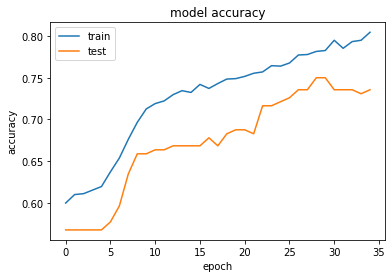

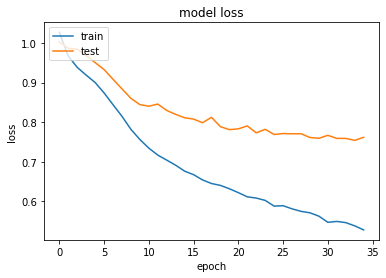

Iteration:2
=== Scores ===
Accuracy: 0.761905
Precision: 0.736694
Recall: 0.648856
F1 score: 0.679170
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.62      0.41      0.49        39
    Religion       0.82      0.62      0.71        53
      Racism       0.77      0.91      0.84       139

    accuracy                           0.76       231
   macro avg       0.74      0.65      0.68       231
weighted avg       0.76      0.76      0.75       231

=== Confusion Matrix ===
[[ 16   5  18]
 [  0  33  20]
 [ 10   2 127]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_130"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_197 (Dropout)        (None, 24, 4)            

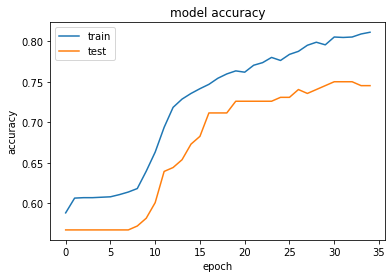

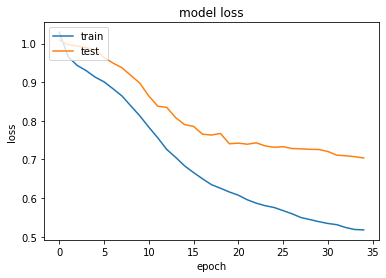

Iteration:3
=== Scores ===
Accuracy: 0.735931
Precision: 0.668702
Recall: 0.620921
F1 score: 0.628206
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.53      0.26      0.34        39
    Religion       0.71      0.74      0.72        53
      Racism       0.77      0.87      0.82       139

    accuracy                           0.74       231
   macro avg       0.67      0.62      0.63       231
weighted avg       0.72      0.74      0.72       231

=== Confusion Matrix ===
[[ 10   4  25]
 [  3  39  11]
 [  6  12 121]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_131"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_199 (Dropout)        (None, 24, 4)            

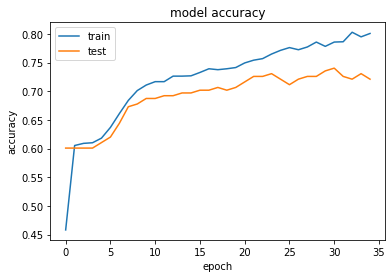

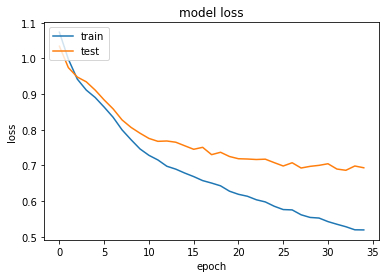

Iteration:4
=== Scores ===
Accuracy: 0.761905
Precision: 0.735881
Recall: 0.627527
F1 score: 0.643602
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.71      0.26      0.38        39
    Religion       0.71      0.70      0.70        53
      Racism       0.78      0.93      0.85       139

    accuracy                           0.76       231
   macro avg       0.74      0.63      0.64       231
weighted avg       0.75      0.76      0.74       231

=== Confusion Matrix ===
[[ 10   6  23]
 [  3  37  13]
 [  1   9 129]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_132"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_201 (Dropout)        (None, 24, 4)            

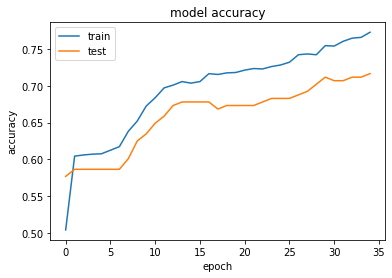

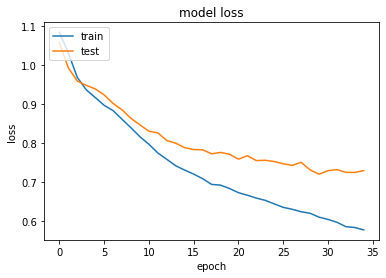

Iteration:5
=== Scores ===
Accuracy: 0.753247
Precision: 0.728042
Recall: 0.578679
F1 score: 0.592116
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.67      0.15      0.25        39
    Religion       0.76      0.60      0.67        53
      Racism       0.76      0.98      0.85       139

    accuracy                           0.75       231
   macro avg       0.73      0.58      0.59       231
weighted avg       0.74      0.75      0.71       231

=== Confusion Matrix ===
[[  6   7  26]
 [  3  32  18]
 [  0   3 136]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_133"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_203 (Dropout)        (None, 24, 4)            

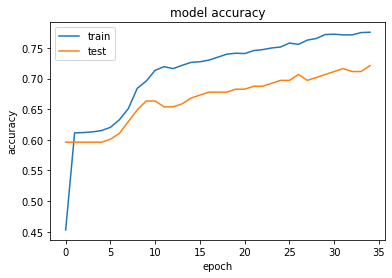

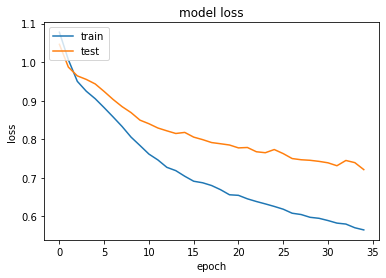

Iteration:6
=== Scores ===
Accuracy: 0.770563
Precision: 0.821580
Recall: 0.631314
F1 score: 0.671954
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.93      0.33      0.49        39
    Religion       0.78      0.60      0.68        53
      Racism       0.76      0.96      0.84       139

    accuracy                           0.77       231
   macro avg       0.82      0.63      0.67       231
weighted avg       0.79      0.77      0.75       231

=== Confusion Matrix ===
[[ 13   3  23]
 [  1  32  20]
 [  0   6 133]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_134"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_29 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_205 (Dropout)        (None, 24, 4)            

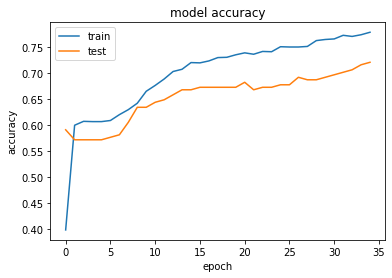

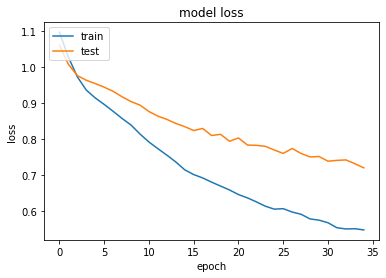

Iteration:7
=== Scores ===
Accuracy: 0.787879
Precision: 0.864718
Recall: 0.649698
F1 score: 0.679335
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       1.00      0.26      0.41        39
    Religion       0.83      0.74      0.78        53
      Racism       0.76      0.96      0.85       139

    accuracy                           0.79       231
   macro avg       0.86      0.65      0.68       231
weighted avg       0.82      0.79      0.76       231

=== Confusion Matrix ===
[[ 10   2  27]
 [  0  39  14]
 [  0   6 133]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_135"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_207 (Dropout)        (None, 24, 4)            

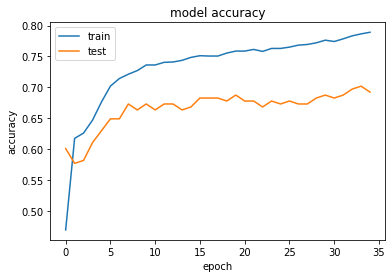

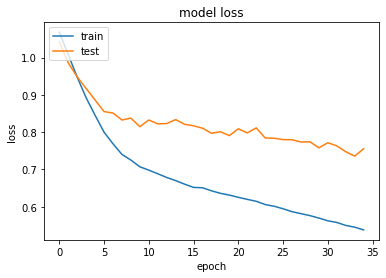

Iteration:8
=== Scores ===
Accuracy: 0.747826
Precision: 0.736365
Recall: 0.581606
F1 score: 0.601489
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.70      0.18      0.29        38
    Religion       0.76      0.60      0.67        53
      Racism       0.75      0.96      0.84       139

    accuracy                           0.75       230
   macro avg       0.74      0.58      0.60       230
weighted avg       0.74      0.75      0.71       230

=== Confusion Matrix ===
[[  7   6  25]
 [  1  32  20]
 [  2   4 133]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_136"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_209 (Dropout)        (None, 24, 4)            

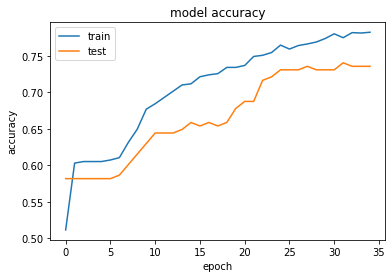

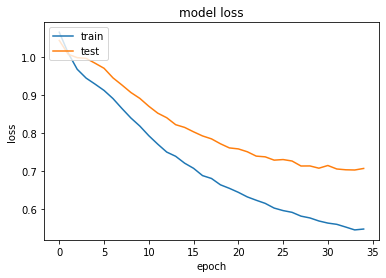

Iteration:9
=== Scores ===
Accuracy: 0.773913
Precision: 0.778241
Recall: 0.639859
F1 score: 0.679493
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.68      0.34      0.46        38
    Religion       0.89      0.63      0.74        52
      Racism       0.76      0.94      0.84       140

    accuracy                           0.77       230
   macro avg       0.78      0.64      0.68       230
weighted avg       0.78      0.77      0.75       230

=== Confusion Matrix ===
[[ 13   0  25]
 [  2  33  17]
 [  4   4 132]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_137"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_211 (Dropout)        (None, 24, 4)            

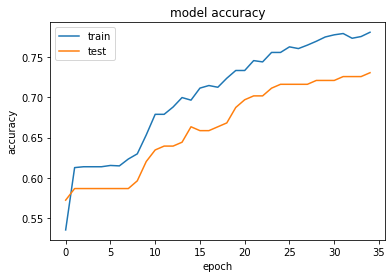

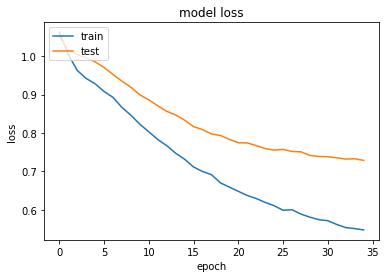

Iteration:10
=== Scores ===
Accuracy: 0.782609
Precision: 0.772522
Recall: 0.682967
F1 score: 0.715198
=== Classification Report ===
              precision    recall  f1-score   support

    Politics       0.76      0.50      0.60        38
    Religion       0.77      0.63      0.69        52
      Racism       0.79      0.91      0.85       140

    accuracy                           0.78       230
   macro avg       0.77      0.68      0.72       230
weighted avg       0.78      0.78      0.77       230

=== Confusion Matrix ===
[[ 19   4  15]
 [  0  33  19]
 [  6   6 128]]




Averages
Accuracy: 0.7611707133446263
Precision: 0.7508485325764463
Recall: 0.6264525278627999
F1 measure: 0.650813312963139
Confusion Matrix

[[ 11.3   4.1  23.3]
 [  1.6  34.6  16.6]
 [  3.6   5.9 129.7]]


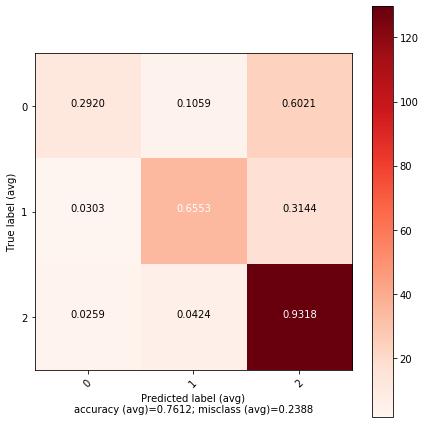

In [133]:
reset_seeds()
lstm_att = LSTM_Model_ATTENTION(xTrain, yTrain, target_names, class_names, 'LSTM (Glove) ',  _epochs = 35, _verbose=2, graph = True, _optimizer = RMSprop(lr=0.0001))